# This notebook is structured in the following parts:
A. Initiation: Importing necessary python libraries and loading the datasets

B. Model training from Educational Site (StackOverflow)

C. Model training from Literature Review

D. Optimization of the 5 best performing regression models

E. Predicting failure scores with the Test Dataset (xTest.npy file)

# Part: A - Initiation

Importing python libraries concerning the cross validation and evaluation metrics and the Train/Test datasets.

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt

# cross validation and learning curves are required
# When performing cross-validation, it is common to use 10 folds. https://cran.r-project.org/web/packages/cvms/vignettes/picking_the_number_of_folds_for_cross-validation.html#:~:text=When%20performing%20cross%2Dvalidation%2C%20it,common%20to%20use%2010%20folds.
# it is much common to use MSE to evaluate the accurracy of quantified prediction model, according to literature review
# calculating the mean MSE and its std error to get overall result of k-fold cross validation https://www.statology.org/k-fold-cross-validation/#:~:text=One%20way%20to%20avoid%20this,k%2Dfold%20cross%2Dvalidation.

from sklearn import metrics, model_selection # this is used for cross validation
from mlxtend.plotting import plot_learning_curves # this is for learning curve plotting
from sklearn.model_selection import train_test_split # this is for train-test spliting

#from google.colab import drive
#drive.mount('/content/drive')

print(os.getcwd())

# train dataset
x_train = np.load('xTrain.npy')
y_train = np.load('yTrain.npy')

# test dataset
x_test = np.load('xTest.npy')


/content


Plotting the median outcome and its lower and higher quartiles of the Train Dataset.

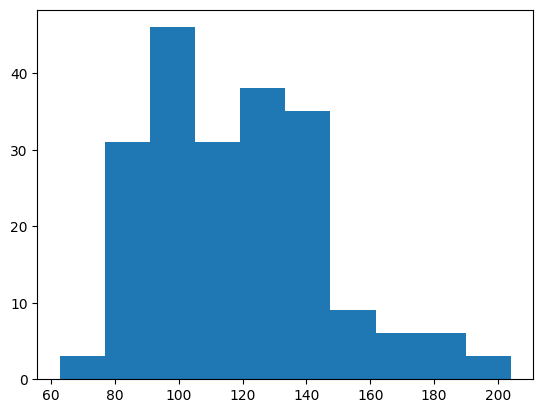

115.91003600248736
96.57984489942571 136.03171290778906


In [19]:
plt.hist(y_train, label="Value")
plt.show()
print(np.median(y_train)) #Prints median
print(np.quantile(y_train, q=0.25), np.quantile(y_train, q = 0.75)) #Prints the lower and higher quartiles respectively


Obtaining the dimensions of the Train and Test datasets

In [20]:
print(x_train.shape) #Train feature values
print(y_train.shape) #Train output labels
print(x_test.shape) #Test feature values

(208, 103)
(208,)
(52, 103)


# Part: B - Model training from Educational Site (StackOverflow)

Model: 1 - Linear Regression

178.9030965188187
[1.34701595e+02 1.36585829e+02 1.53250361e+02 1.21298738e+02
 1.59150232e+02 8.57318030e+01 1.48854587e+02 8.63580547e+01
 1.36578658e+02 1.50305112e+02 1.51992721e+02 1.12387362e+02
 1.03243216e+13 1.32038498e+02 1.34200896e+02 1.41935595e+02
 1.76680743e+02 1.97672707e+02 1.83088851e+02 1.96027638e+02
 1.49696889e+02 1.55834083e+02 1.68372901e+02 1.55322776e+02
 1.57302355e+02 1.44735832e+02 1.39828493e+02 9.96714214e+01
 1.23692995e+02 1.41334407e+02 1.56888276e+02 1.16270137e+02
 1.82330329e+02 9.34624622e+01 1.30280195e+02 1.81201707e+02
 1.66814576e+02 1.41557088e+02 1.60056274e+02 1.87103393e+02
 1.40332706e+02 1.58650336e+02 1.57704237e+02 1.36873300e+02
 1.38384387e+02 8.97484642e+01 1.32812716e+02 9.43392899e+01
 1.34773521e+02 1.26539860e+02 1.60136093e+02 1.58724289e+02]


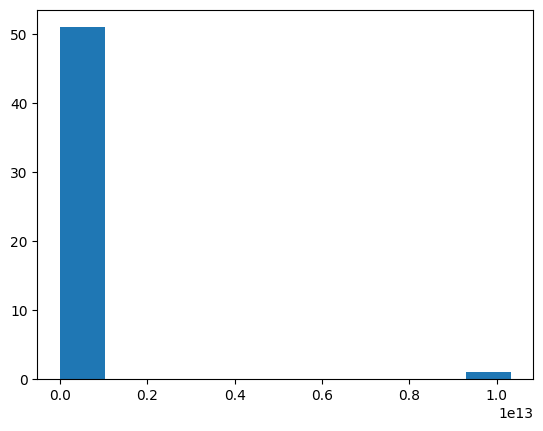

[-4.20966209e+01 -3.47143122e+00 -4.46725438e-01 -3.92693788e+00
 -5.38972264e+00 -3.34217863e+00 -8.11721280e+25  2.87753216e-01
 -1.04931648e+00 -1.74944859e+00] 
 [-1.29227843e+02 -4.50102227e+01 -2.47163220e+01 -3.23969920e+01
 -4.53938794e+01 -4.29496470e+01 -1.73348247e+14 -2.17269809e+01
 -3.48039130e+01 -2.97283251e+01]
For linear regression model, the mean RMSE is -17334824726600.76 +/- 32232707037724.17
For linear regression model, the mean r2 is -8.117212796290678e+24 +/- 1.5093301844863233e+25


In [21]:
# cross validation and learning curves are required
# When performing cross-validation, it is common to use 10 folds. https://cran.r-project.org/web/packages/cvms/vignettes/picking_the_number_of_folds_for_cross-validation.html#:~:text=When%20performing%20cross%2Dvalidation%2C%20it,common%20to%20use%2010%20folds.
# it is much common to use MSE to evaluate the accurracy of quantified prediction model, according to literature review
# calculating the mean MSE and its std error to get overall result of k-fold cross validation https://www.statology.org/k-fold-cross-validation/#:~:text=One%20way%20to%20avoid%20this,k%2Dfold%20cross%2Dvalidation.

from sklearn import metrics, model_selection # this is used for cross validation
from mlxtend.plotting import plot_learning_curves # this is for learning curve plotting
from sklearn.model_selection import train_test_split # this is for train-test spliting
from sklearn.linear_model import LinearRegression #the Linear Regression Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# linear regression
model1 = LinearRegression()
model1.fit(x_train, y_train)
predict1 = model1.predict(x_train)
loss = sum((predict1 - y_train) ** 2) / len(predict1)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model1.predict(x_test))
plt.hist(model1.predict(x_test))
plt.show()


# cross validation
r2 = model_selection.cross_val_score(model1, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model1, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) # there is a very significant outlier on the 7th iteration
print(f'For linear regression model, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For linear regression model, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

#For linear regression model, the mean RMSE is -17334824726600.76 +/- 32232707037724.17
#For linear regression model, the mean r2 is -8.117212796290678e+24 +/- 1.5093301844863233e+25

Model: 2 - Support Vector Regression (SVR)

619.8080774927892
[118.33254344 117.08484907 118.33630358 117.24399276 119.15782846
 117.58027717 117.9667335  116.14388668 117.09475724 119.3301763
 118.54281086 118.50097901 117.77803186 118.75723406 118.01920043
 123.20764332 122.42075931 119.55271529 120.76532965 123.93351806
 118.60718967 117.74528628 124.13801506 118.06537478 119.91829706
 120.07275487 118.66108656 118.92802143 119.61009404 121.48941997
 120.09146877 119.6815171  120.41502496 118.01705724 116.91962997
 124.70167129 118.94734405 121.46794872 118.78735566 124.30397055
 117.71427483 117.89883122 118.93535473 119.37492744 117.46094592
 118.19607687 118.3094043  120.35336254 120.55063127 122.18313904
 123.56280727 121.00762296]


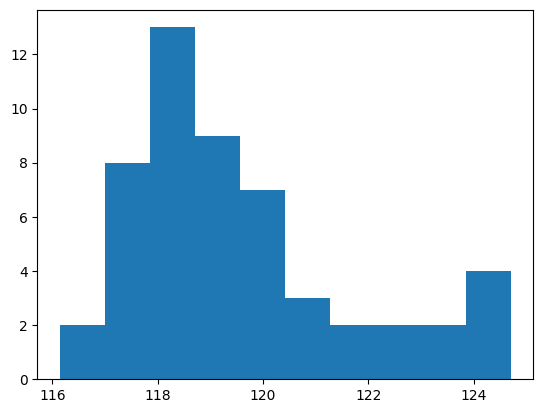

[-0.2521426  -0.56275274 -0.38720714 -0.50199646 -0.04722221 -3.02663129
 -0.08991533 -0.84881631 -1.08478054 -0.41520581] 
 [-22.0273057  -26.60927358 -24.20256775 -17.88753922 -18.37704665
 -41.35963407 -20.08687469 -35.0050752  -35.10376754 -21.32835894]
For SVR model, the mean RMSE is -26.1987443353907 +/- 4.799352566408817
For SVR model, the mean r2 is -0.7216670420662379 +/- 0.5116541847206775


In [22]:
#Importing the SVR model from the svm library
from sklearn import svm

# svm SVR
model2 = svm.SVR()
model2.fit(x_train, y_train)
predict2 = model2.predict(x_train)
loss = sum((predict2 - y_train) ** 2) / len(predict2)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model2.predict(x_test))
plt.hist(model2.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model2, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model2, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For SVR model, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For SVR model, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For SVR model, the mean RMSE is -26.1987443353907 +/- 4.799352566408817
# For SVR model, the mean r2 is -0.7216670420662379 +/- 0.5116541847206775

Model: 3 - Stochastic Gradient Descent (SGD) Regression

1.9526893762131504e+25
[ 5.21829642e+12 -4.94977935e+12 -6.82466108e+12  5.48937546e+12
  1.71125109e+12 -8.94279898e+11 -7.69058315e+12 -1.14149910e+12
 -9.62276178e+12 -5.97755829e+12 -1.04796960e+12  3.76548606e+12
 -6.03460881e+12  2.28817091e+12  4.72739613e+12 -5.58291460e+12
 -1.88772469e+12 -1.64551301e+12  1.65683468e+12 -1.62893606e+12
  4.19149867e+12 -7.45239880e+12 -1.07826237e+12  1.20697301e+12
 -6.19644147e+12 -2.33631123e+12 -8.16734780e+12 -1.80163278e+12
 -5.63588460e+12  8.84904759e+11  1.97937023e+12  3.90787851e+12
 -1.96905708e+12 -1.14151318e+12 -1.45428353e+12 -3.66417935e+12
 -3.43840084e+12 -3.64888674e+12 -4.51148095e+12 -3.05974585e+12
 -5.98028607e+11 -4.58309818e+12  6.53563219e+12  4.59429045e+12
  7.68144494e+12 -2.14060227e+12 -4.34889307e+12 -3.80209051e+12
  4.27842581e+12 -6.76097291e+11 -2.29465219e+12  4.65454457e+12]


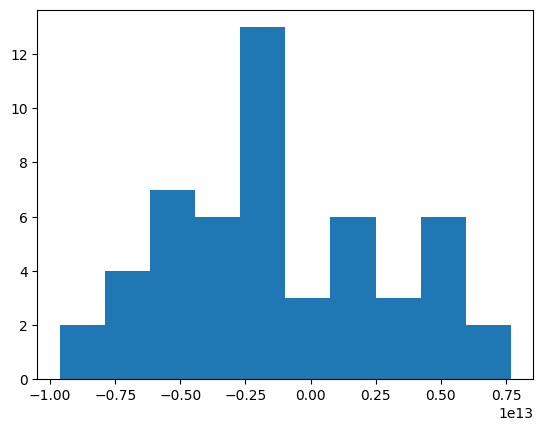

[-2.21301094e+22 -8.23725302e+22 -1.56108068e+23 -2.40321461e+23
 -5.87147545e+23 -1.61001153e+23 -4.88051687e+23 -6.25721574e+22
 -2.15519464e+23 -1.29870283e+23] 
 [-1.25130207e+13 -4.93284524e+12 -8.99531894e+12 -3.82679308e+12
 -6.43044878e+12 -8.27587202e+12 -5.56690233e+12 -7.88426176e+12
 -5.95778772e+12 -7.07042096e+12]
For SGDRegressor, the mean RMSE is -7145367155233.403 +/- 1445423145474.0579
For SGDRegressor, the mean r2 is -2.145094457020831e+23 +/- 1.0830562573909376e+23


In [24]:
from sklearn import linear_model
'''
linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor()
'''
model3 = linear_model.SGDRegressor() #Initializing the SGD model from the linear_model library
model3.fit(x_train, y_train)
predict3 = model3.predict(x_train)
loss = sum((predict3 - y_train) ** 2) / len(predict3)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model3.predict(x_test))
plt.hist(model3.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model3, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model3, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE)
print(f'For SGDRegressor, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For SGDRegressor, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For SGDRegressor, the mean RMSE is -8240052162584.786 +/- 2822160742357.61
# For SGDRegressor, the mean r2 is -2.711662624719434e+23 +/- 1.1095087029300214e+23

Model: 4 - BayesianRidge Regression

245.68012782249465
[133.38709124 126.05897376 136.80372101 125.27762563 146.16867812
 124.53259824 133.91561762 110.50008884 134.52027304 143.45678115
 146.94524676 130.65041721 113.29314899 140.01500705 142.65354292
 151.26014231 154.29741284 152.2635423  164.66531657 170.36657928
 140.39885556 147.75025773 160.27533145 139.3219489  146.1329993
 135.2682658  141.57936604 127.94497809 137.52279819 152.24895007
 145.15106852 137.59400295 158.51269487 127.68209408 131.47131961
 169.94996566 153.50999378 149.97752223 139.00797616 171.54563753
 142.30824027 137.96109576 145.8794997  137.09969035 131.8835516
 128.70936064 144.13729896 153.38053451 147.31566617 147.39834447
 155.67405604 149.01153161]


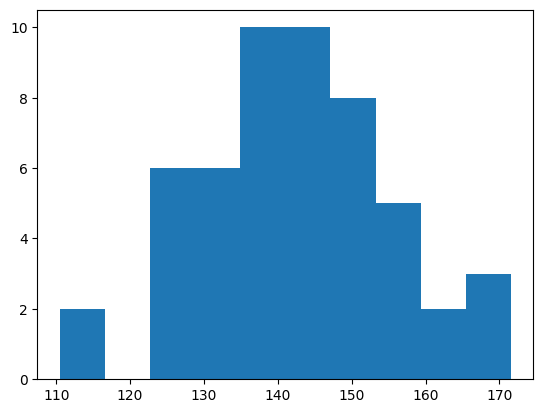

[ 0.20801829 -0.04243134  0.39711221 -0.04282351 -0.57026464 -1.1008665
 -0.25514159  0.44124102  0.22437338 -0.5927259 ] 
 [-17.51830402 -21.73259643 -15.95544903 -14.90464206 -22.50311927
 -29.87479843 -21.55571087 -19.24404619 -21.41163894 -22.6265407 ]
For BayesianRidge, the mean RMSE is -20.732684593229422 +/- 2.492931207080644
For BayesianRidge, the mean r2 is -0.1333508585150051 +/- 0.2923848728432609


In [25]:
from sklearn import linear_model

model04 = linear_model.BayesianRidge() #Initializing the BayesianRidge model from the linear_model library
model04.fit(x_train, y_train)
predict04 = model04.predict(x_train)
loss = sum((predict04 - y_train) ** 2) / len(predict04)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model04.predict(x_test))
plt.hist(model04.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model04, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model04, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE)
print(f'For BayesianRidge, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For BayesianRidge, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For BayesianRidge, the mean RMSE is -20.732684593229422 +/- 2.492931207080644
# For BayesianRidge, the mean r2 is -0.1333508585150051 +/- 0.2923848728432609

Model: 5 - LassoLars Regression

194.47489683762558
[133.59142271 124.1446183  146.71197961 122.99385358 151.94946044
 126.0307317  138.19723754  92.07430207 139.01686156 151.38726285
 157.155187   130.34368093 101.24638014 137.1725645  136.50182881
 143.70800875 162.29263962 172.67848879 171.81106357 185.13920308
 143.29696877 149.7359422  165.4238232  148.8922289  151.65751797
 140.5219403  136.60234154 111.90568624 127.69058604 148.34128269
 149.76499598 134.79491164 175.98386199 102.51815488 143.55528357
 174.8209729  166.74879364 149.1082223  143.41051682 182.53080869
 137.55497437 142.38232112 150.73763784 136.99442887 135.45157576
 126.96882695 141.10384359 147.75955758 143.8199453  138.49955916
 154.70418589 150.02422505]


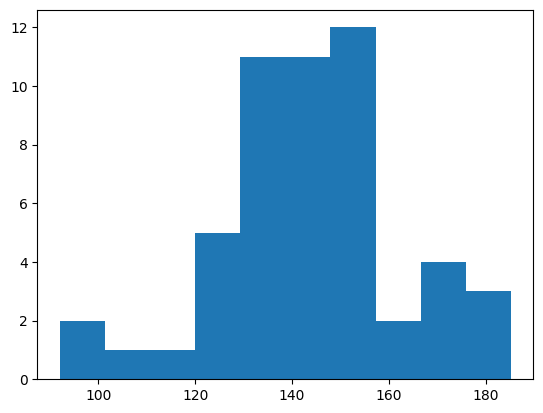

[-0.54644769 -0.46387745  0.18145648 -1.36901324 -1.01955332 -1.67778418
 -0.61667751  0.54103564  0.24997408 -1.12481754] 
 [-24.47947511 -25.75373636 -18.59138194 -22.46466201 -25.5201932
 -33.72822928 -24.4640124  -17.44108972 -21.05531268 -26.13415492]
For LassoLars, the mean MSE is -23.963224762138427 +/- 2.6896472341301103
For LassoLars, the mean r2 is -0.5845704750483721 +/- 0.4320386735591381


In [ ]:
from sklearn import linear_model

model5 = linear_model.LassoLars() #Initializing the LassoLars model from the linear_model library
model5.fit(x_train, y_train)
predict5 = model5.predict(x_train)
loss = sum((predict5 - y_train) ** 2) / len(predict5)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model5.predict(x_test))
plt.hist(model5.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model5, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model5, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For LassoLars, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For LassoLars, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For LassoLars, the mean RMSE is -23.963224762138427 +/- 2.6896472341301103
# For LassoLars, the mean r2 is -0.5845704750483721 +/- 0.4320386735591381

Model: 6 - Automatic Relevance Determination (ARD) Regression

248.3250693512586
[136.54439991 118.62635132 141.20816103 126.64613481 146.94234159
 108.06790628 138.840829   110.85418337 144.90931869 147.26367997
 162.07919376 126.6393145   86.23043244 142.66884174 151.98171841
 159.85209034 157.9077721  156.55525965 157.95863974 181.54126509
 140.24261739 143.94130255 163.32133144 143.02306537 145.54330616
 132.17424374 139.83065979 126.9393779  153.40140073 148.46327471
 150.3461849  132.12330458 162.45242437 120.85061321 135.62000109
 172.08289447 166.4033493  156.72411563 140.84910488 178.17290716
 142.16426666 133.54345363 159.15917877 139.10298888 127.82263942
 127.52617155 142.44687474 159.50699746 148.88810368 148.04592386
 154.34650315 149.28274754]


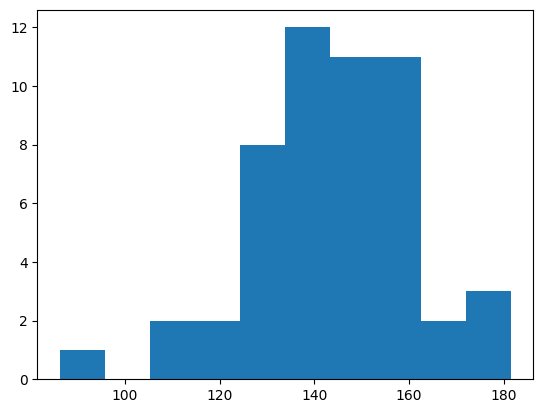

[-0.5401253  -0.32510656  0.27266074 -0.63097178 -0.93712647 -1.42258683
 -0.43197697  0.42904351  0.26442107 -1.19729455] 
 [-24.42938374 -24.502663   -17.52505146 -18.6397193  -24.99397226
 -32.08081787 -23.02417121 -19.45295757 -20.85154296 -26.57613243]
For ARDRegression, the mean MSE is -23.207641179718983 +/- 2.5501171141127545
For ARDRegression, the mean r2 is -0.4519063138056734 +/- 0.37207905179843387


In [ ]:
from sklearn import linear_model

model6 = linear_model.ARDRegression() #Initializing the ARD Regression model from the linear_model library
model6.fit(x_train, y_train)
predict6 = model6.predict(x_train)
loss = sum((predict6 - y_train) ** 2) / len(predict6)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model6.predict(x_test))
plt.hist(model6.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model6, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model6, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For ARDRegression, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For ARDRegression, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For ARDRegression, the mean RMSE is -23.207641179718983 +/- 2.5501171141127545
# For ARDRegression, the mean r2 is -0.4519063138056734 +/- 0.37207905179843387

Model: 7 - Ridge Regression

178.7842388886143
[134.95089165 136.19293236 153.17156622 121.33798885 159.22695282
  87.08279738 148.60575527  86.01497443 136.92327737 150.0984343
 152.14554829 110.35573324  59.1545875  132.84546871 134.92250986
 141.82319574 176.24325322 196.85954156 183.46929242 195.66980449
 150.50237395 156.42972286 168.84773696 155.51949956 157.66665415
 145.07104137 140.32673177  99.47506388 123.46496384 141.41882259
 157.20497391 114.20189392 182.1514968   93.15841341 129.24494196
 181.23493972 166.68074435 142.3327473  160.16778775 186.59807466
 140.16316792 159.20573531 157.74201736 136.93016369 138.45267661
  87.45137095 133.37398897  92.54415921 134.48833525 126.81660435
 159.54278681 156.49802334]


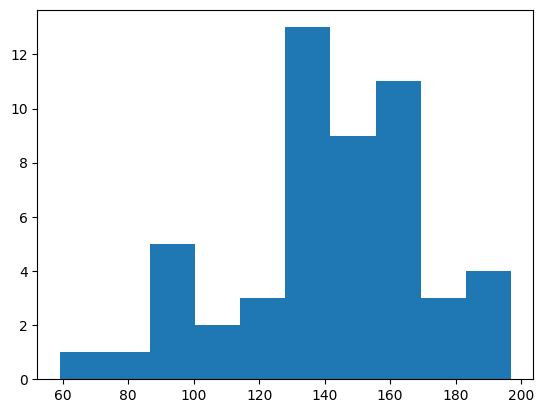

[-13.57524749  -2.3929232   -0.43723322  -3.91296875  -3.90239729
  -3.40227086  -1.73519443   0.29703007  -0.98471677  -1.78896466] 
 [-75.15233056 -39.20801894 -24.63510452 -32.35103247 -39.76129748
 -43.24581993 -31.82072649 -21.58502264 -34.25096625 -29.94119608]
For Ridge, the mean MSE is -37.1951515351678 +/- 8.772097538809506
For Ridge, the mean r2 is -3.1834886603144232 +/- 2.3045071439314713


In [ ]:
from sklearn import linear_model

model7 = linear_model.Ridge() #Initializing the Ridge Regression model from the linear_model library
model7.fit(x_train, y_train)
predict7 = model7.predict(x_train)
loss = sum((predict7 - y_train) ** 2) / len(predict7)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model7.predict(x_test))
plt.hist(model7.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model7, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model7, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For Ridge, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For Ridge, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For Ridge, the mean RMSE is -37.1951515351678 +/- 8.772097538809506
# For Ridge, the mean r2 is -3.1834886603144232 +/- 2.3045071439314713

Model: 8 - Lasso Regression

194.47463703135543
[133.59036585 124.14324935 146.71071505 122.99183279 151.94884543
 126.03106223 138.20557952  92.07701077 139.01759662 151.38831228
 157.16024585 130.34152105 101.24122646 137.17188992 136.50547517
 143.71468823 162.29355207 172.67662502 171.81103158 185.14039429
 143.29514534 149.74014646 165.42526828 148.89199925 151.66224825
 140.52026981 136.60330153 111.90716704 127.69060475 148.34176693
 149.76410374 134.79472305 175.98073546 102.53131014 143.56176105
 174.82340861 166.74550169 149.105463   143.40957518 182.53246953
 137.55339709 142.38841983 150.74916564 136.99190457 135.45759486
 126.96993682 141.10985025 147.75893117 143.81983692 138.4999416
 154.70537636 150.02456418]


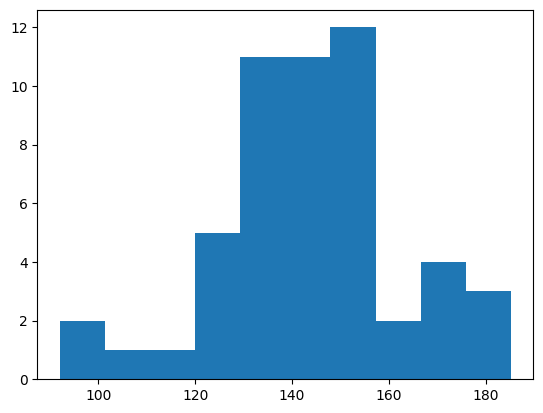

[-0.54681716 -0.4638565   0.18110834 -1.36879465 -1.0196946  -1.67759701
 -0.61703054  0.54100831  0.24994728 -1.12465451] 
 [-24.4823992  -25.75355208 -18.59533519 -22.46362555 -25.52108579
 -33.72705049 -24.46668328 -17.4416089  -21.05568876 -26.1331523 ]
For Lasso, the mean MSE is -23.96401815323282 +/- 2.6891625907470327
For Lasso, the mean r2 is -0.5846381032380272 +/- 0.4319744240805189


In [ ]:
from sklearn import linear_model

model8 = linear_model.Lasso() #Initializing the Lasso Regression model from the linear_model library
model8.fit(x_train, y_train)
predict8 = model8.predict(x_train)
loss = sum((predict8 - y_train) ** 2) / len(predict8)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model8.predict(x_test))
plt.hist(model8.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model8, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model8, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For Lasso, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For Lasso, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For Lasso, the mean RMSE is -23.96401815323282 +/- 2.6891625907470327
# For Lasso, the mean r2 is -0.5846381032380272 +/- 0.4319744240805189

Model: 9 - Passive Aggressive Regression

780.5785073111595
[178.18343595 144.00213857 131.96793172 167.36371757 185.29245907
 164.68664091 171.38897755 131.78459157 154.69281062 172.16360941
 172.85849077 163.14416966 122.30746962 172.32991864 179.07630097
 180.15670749 193.35828519 228.46016948 198.11241122 203.52006116
 158.72731261 203.13368926 191.80148563 184.87055622 148.89387676
 184.16336022 163.36621962 165.46842895 174.80820245 178.91312073
 187.05274588 187.0277623  200.08044845 126.86418661 182.98475873
 208.02688323 225.8551646  194.40318451 133.8780858  190.3024976
 198.6781469  178.30013584 158.27139141 186.99569217 157.8359947
 173.56901435 195.13176867 194.98236742 164.46829192 175.4940212
 178.81492937 200.62703749]


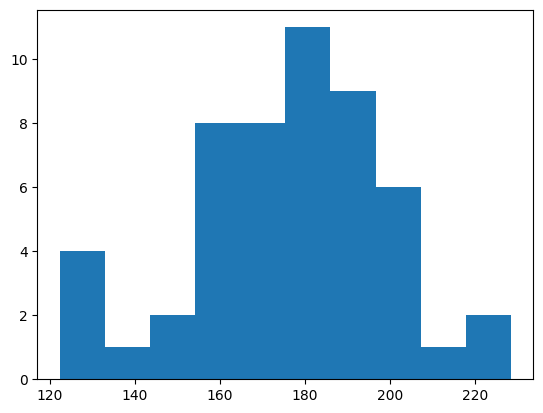

[-1.44343923 -0.63456972 -0.42679331 -1.62561526 -2.7097901   0.01058704
 -2.18359688  0.51729412 -0.23826797 -2.35867848] 
 [-24.17679661 -39.11881067 -27.0434371  -27.56614581 -21.28637996
 -18.84847473 -35.22183532 -18.9018048  -28.17836496 -37.98797794]
For PassiveAggressiveRegressor, the mean MSE is -27.83300278805479 +/- 4.394142894893621
For PassiveAggressiveRegressor, the mean r2 is -1.1092869789329751 +/- 0.6501971970642202


In [ ]:
from sklearn import linear_model

model9 = linear_model.PassiveAggressiveRegressor() #Initializing the PassiveAggressiveRegressor model from the linear_model library
model9.fit(x_train, y_train)
predict9 = model9.predict(x_train)
loss = sum((predict9 - y_train) ** 2) / len(predict9)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model9.predict(x_test))
plt.hist(model9.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model9, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model9, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For PassiveAggressiveRegressor, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For PassiveAggressiveRegressor, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For PassiveAggressiveRegressor, the mean RMSE is -31.263542537963964 +/- 4.221343565338547
# For PassiveAggressiveRegressor, the mean r2 is -0.8565926499683734 +/- 0.49652754314464703
# unstable

Model: 10 - TheilSenRegressor Regression

314.208190061957
[134.3852987  132.99847185 148.43368151 122.04459212 159.14294972
  78.9228504   98.81859188  78.51589954 132.41039384 145.59675856
 145.96214176 154.84966695  73.27434852 141.20673276 152.17667752
 137.3141422  157.92032994 203.20754375 185.71797517 182.74267016
 150.34749053 156.8097558  175.49035157 155.74192813 156.97247971
 145.80257495 147.73603975  85.77106906 121.92194608 132.17212275
 163.84032497 150.54091512 182.33443123  93.05773764 134.84638497
 182.42982986 160.45949525 140.02733438 147.62592595 181.69903999
 137.85173681 159.64474158 106.02786424 140.37579065 121.05503365
  95.68890483 125.058974   121.46673142 142.12651528 143.289259
 150.40868157 169.54814986]


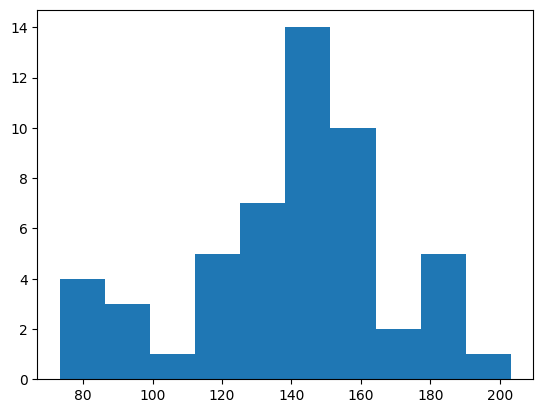

KeyboardInterrupt: ignored

In [ ]:
from sklearn import linear_model

model10 = linear_model.TheilSenRegressor(max_iter=600) #Initializing the TheilSenRegressor model from the linear_model library
model10.fit(x_train, y_train)
predict10 = model10.predict(x_train)
loss = sum((predict10 - y_train) ** 2) / len(predict10)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model10.predict(x_test))
plt.hist(model10.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model10, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model10, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For TheilSenRegressor, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For TheilSenRegressor, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# very very slow

# For TheilSenRegressor, the mean RMSE is -46.81557636479332 +/- 20.744338557471938
# For TheilSenRegressor, the mean r2 is -6.212058374589799 +/- 6.668426828924035

Model: 11 - Huber Regressor

In [ ]:
from sklearn import linear_model

model11 = linear_model.HuberRegressor() #Initializing the HuberRegressor model from the linear_model library
model11.fit(x_train, y_train)
predict11 = model11.predict(x_train)
loss = sum((predict11 - y_train) ** 2) / len(predict11)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model11.predict(x_test))
plt.hist(model11.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model11, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model11, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For HuberRegressor, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For HuberRegressor, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For HuberRegressor, the mean RMSE is -31.449954903808628 +/- 3.1805713793362473
# For HuberRegressor, the mean r2 is -1.7643910649074102 +/- 0.8050999755813685

# iteration reaches limit

Model: 12 - Lars Regression

992.6543203864609
[ 137.4458254    48.1687437   268.50746303  109.36679585  125.68873211
   91.02116375  375.67235012    0.42515732  272.83990791  182.51949925
   82.93418912  -48.8175151  -225.65002332   13.63489882   25.98752524
  125.74013472  196.22010719  387.00552549  211.71500481  312.76238489
  235.31129879  160.64131522  227.73885194  225.75042895  243.14151354
  149.83189696  113.07860199  108.61962449   70.27799516  149.45578365
   96.27294255  -89.59800887  270.2303406   123.45098259  126.66972775
  190.66884503  198.85476338   72.79038547   77.07434418  245.68602039
  -17.40676381  239.42088393  320.8354104   124.9073914    90.25195076
 -134.84038178  113.64891708   57.97027962   67.205768     97.47791347
  162.07653635 -102.21755695]


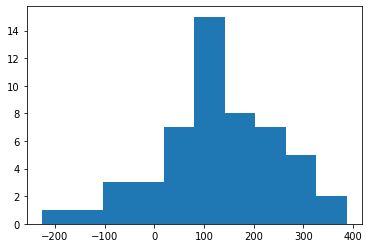

[-1.89827252e+92 -1.63503909e+02 -8.02505105e+00 -9.41888002e+01
 -1.86992434e+07 -8.30212750e+00 -9.82401737e+00 -3.20275243e+01
 -1.53547134e+06 -6.51272097e+05] 
 [-2.71215037e+47 -2.73008391e+02 -6.17327494e+01 -1.42399699e+02
 -7.76548035e+04 -6.28632601e+01 -6.33009502e+01 -1.47952444e+02
 -3.01262140e+04 -1.44686899e+04]
For Lars, the mean MSE is -2.7121503709451353e+46 +/- 5.043024647085623e+46
For Lars, the mean r2 is -1.898272521246722e+91 +/- 3.5296844946678075e+91


In [ ]:
from sklearn import linear_model

model12 = linear_model.Lars() #Initializing the Lars regression model from the linear_model library
model12.fit(x_train, y_train)
predict12 = model12.predict(x_train)
loss = sum((predict12 - y_train) ** 2) / len(predict12)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model12.predict(x_test))
plt.hist(model12.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model12, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model12, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For Lars, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For Lars, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For Lars, the mean RMSE is -2.7121503709451353e+46 +/- 5.043024647085623e+46
# For Lars, the mean r2 is -1.898272521246722e+91 +/- 3.5296844946678075e+91

Model: 13 - RANdom SAmple Consensus (RANSAC) Regression

6118.793946193139
[139.41160101  56.11409602 163.62588029 125.02552793 171.6761488
 397.38662967 351.4802556  -34.25332294  87.48932834  61.89704904
 134.00461615 145.18765439 416.28111836 146.90180941 270.04842554
 169.40472427 121.08214373 151.19926183 133.64945999 195.54195143
 298.81276902 218.22799545 119.19906737 154.16921966  57.26734597
 170.17423119 151.03617879  -7.51847313  69.61359399  39.99851243
 173.30472463 166.77973127 185.39194115 123.48343458 -62.65342171
 158.96349209  47.82383189 168.47582101 291.59483462 180.20888349
  75.59203809 207.35925992 411.86647341 141.65848288 236.3623875
 411.40451805  79.19646047 -78.3360084  145.49966505 117.61076228
 188.82954941 458.34302922]


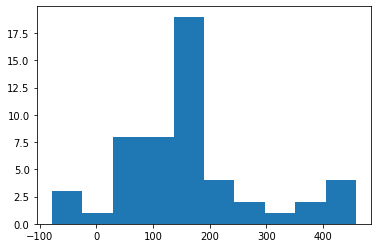

[-4.43606636e+24 -3.99342217e+01 -7.23550002e+00 -3.85672262e+01
 -6.42209033e+01 -9.33661405e+00 -1.03137689e+25 -1.35632755e+01
 -4.64788926e+02 -4.17212940e+20] 
 [-1.45011634e+03 -3.76059732e+02 -8.51623937e+01 -5.22003699e+01
 -2.75987405e+02 -8.10139554e+01 -3.62377852e+13 -7.51953162e+01
 -7.88825319e+01 -6.07476739e+01]
For RANSACRegressor, the mean MSE is -3623778518536.9897 +/- 6738123585961.93
For RANSACRegressor, the mean r2 is -1.4750252450010405e+24 +/- 2.001653477022237e+24


In [ ]:
from sklearn import linear_model

model013 = linear_model.RANSACRegressor() #Initializing the RANSAC model from the linear_model library
model013.fit(x_train, y_train)
predict013 = model013.predict(x_train)
loss = sum((predict013 - y_train) ** 2) / len(predict013)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model013.predict(x_test))
plt.hist(model013.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model013, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model013, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE)
print(f'For RANSACRegressor, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For RANSACRegressor, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For RANSACRegressor, the mean RMSE is -92063106324.27536 +/- 171183911115.0461
# For RANSACRegressor, the mean r2 is -4248.650922215536 +/- 7769.264156273173

# Part: C - Model training from Literature Review

Model: 14 - Random Forest Regression

44.7007269015905
[129.16640057 131.6011355  142.03174636 126.8153637  161.53968798
 136.01751263 139.79256159 127.60656319 137.47982241 149.34358161
 147.98996651 147.88528059 133.53772824 149.37541322 141.69684883
 157.37341643 153.20646695 141.87640745 151.48430957 154.05317136
 139.16381465 142.36983291 137.92899617 123.09093437 139.3706421
 136.38993392 150.94828787 133.34735743 143.76255243 134.02258695
 142.28282911 131.55902508 138.4656042  139.07710251 130.89888834
 161.12650869 145.76848298 146.54984826 134.74970933 155.72007389
 128.61488138 133.92248546 137.9409919  130.78794881 123.52664436
 128.39667751 134.80953715 141.51969278 136.42599596 137.70001595
 140.54585306 143.13587746]


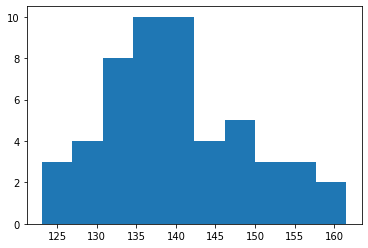

[ 0.44325674  0.31446907  0.32538955  0.31409768  0.18101981 -0.08563231
  0.2739007   0.29691401 -0.01283442 -0.99801562] 
 [-14.68797642 -17.62387536 -16.87785758 -12.08780043 -16.2514829
 -21.47569051 -16.39509726 -21.58680441 -24.46767959 -25.34236137]
For Random Forest (Regressor), the mean MSE is -18.67966258147819 +/- 2.5481856661347835
For Random Forest (Regressor), the mean r2 is 0.10525651974576285 +/- 0.24703731373773835


In [ ]:
# Random Forest (Regressor)
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
model14 = RandomForestRegressor(n_estimators = 200, random_state = 0) #Initializing the Random Forest regressor model
 
# fit the regressor with x and y data
model14.fit(x_train, y_train) 

predict14 = model14.predict(x_train)
loss = sum((predict14 - y_train) ** 2) / len(predict14)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model14.predict(x_test))
plt.hist(model14.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model14, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model14, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE)
print(f'For Random Forest (Regressor), the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For Random Forest (Regressor), the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For Random Forest (Regressor), the mean RMSE is -18.751653748635476 +/- 2.726197745195204
# For Random Forest (Regressor), the mean r2 is 0.10195743354007276 +/- 0.25021644982681923

Model: 15 - KNN Regression

295.58664270204156
[121.08684588 126.09660813 137.19934635 121.08684588 123.68638932
 125.67531119 135.46480649 103.85658501 110.34355582 128.13293798
 135.94685413 152.95957904 143.68759915 121.93943647 140.60341989
 141.57965345 145.6100713  139.0149651  186.59198754 136.49494131
 135.07448462 116.25281813 154.78468126 128.29314159 135.48833567
 131.3444562  115.43256696 112.58831876 148.61340555 136.64550231
 125.32606823 142.45097963 126.22466675 128.72379315 114.87292856
 155.36266009 126.15796955 152.62774712 128.26921163 144.97591677
 117.18254669 126.09660813 127.3840992  121.08684588 135.77170516
 133.2983233  128.78665666 129.05742128 138.48958725 120.64147518
 150.6988908  150.57637671]


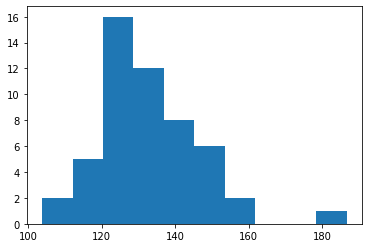

[ 0.33067593 -0.66106234 -0.08955037  0.52810307 -0.83556166 -1.35809257
 -0.3074708   0.30068716 -0.23896072 -0.26224322] 
 [-16.1047025  -27.43347677 -21.44936509 -10.02627751 -24.32992581
 -31.65090854 -22.00047149 -21.52880303 -27.06152876 -20.14276854]
For KNN (Regressor), the mean MSE is -22.17282280274557 +/- 3.590122713093871
For KNN (Regressor), the mean r2 is -0.2593475519085443 +/- 0.3402762147732669


In [ ]:
# KNN (Regressor)
from sklearn.neighbors import KNeighborsRegressor
model15 = KNeighborsRegressor(n_neighbors=5, weights="uniform",leaf_size=30) #Initializing the KNN Regression model
model15.fit(x_train, y_train)

predict15 = model15.predict(x_train)
loss = sum((predict15 - y_train) ** 2) / len(predict15)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model15.predict(x_test))
plt.hist(model15.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model15, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model15, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE)
print(f'For KNN (Regressor), the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For KNN (Regressor), the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For KNN (Regressor), the mean RMSE is -22.17282280274557 +/- 3.590122713093871
# For KNN (Regressor), the mean r2 is -0.2593475519085443 +/- 0.3402762147732669

Model: 16 - XGBoost Regression

1.4543783521326616e-07
[126.69064  124.94874  139.4564   124.05616  159.8894   130.42879
 140.29988  122.1719   142.69228  145.93231  153.11163  140.00826
 120.885826 145.1452   153.1922   149.64381  153.29034  134.79385
 152.66537  156.51639  130.73958  131.03217  147.127    115.55979
 148.96237  133.32594  148.11026  123.863235 133.48201  136.65933
 135.19011  133.82065  140.73013  119.22516  122.113884 158.03221
 148.44502  150.53581  133.42337  156.41864  126.68892  128.76338
 133.72935  125.521454 124.087395 116.17703  137.36588  128.75613
 127.47466  132.76929  150.7216   141.69615 ]


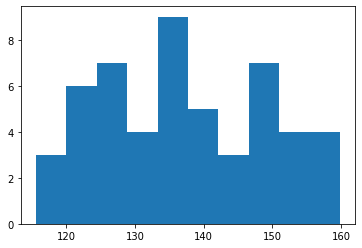

[ 0.48643616  0.18731264  0.12226115  0.38230079  0.20319775 -0.55228726
  0.26438483  0.38052929  0.00740313 -0.68039075] 
 [-14.10690369 -19.18888051 -19.25189333 -11.47108949 -16.02992796
 -25.67980981 -16.50218033 -20.26256967 -24.22200045 -23.24089138]
For XGBoost (Regressor), the mean MSE is -18.99561466221016 +/- 2.682083933710935
For XGBoost (Regressor), the mean r2 is 0.08011477282454826 +/- 0.2312985104506461


In [ ]:
# XGBoost
import xgboost
model16 = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8) #Initializing the XGBoost model
model16.fit(x_train, y_train)

predict16 = model16.predict(x_train)
loss = sum((predict16 - y_train) ** 2) / len(predict16)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model16.predict(x_test))
plt.hist(model16.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model16, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model16, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For XGBoost (Regressor), the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For XGBoost (Regressor), the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For XGBoost (Regressor), the mean RMSE is -18.99561466221016 +/- 2.682083933710935
# For XGBoost (Regressor), the mean r2 is 0.08011477282454826 +/- 0.2312985104506461

# overfitted???

Model: 17 - Artificial Neural Network (ANN) 

Note: Unable to implement since major hyperparameter adjustment (including LAYER, NODES) is required and highly varied in terms of predicting results.

Epoch 1/50
11/11 [==============================] - 2s 4ms/step - loss: 14808.7207
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 14795.4053
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 14756.0820
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 14647.9756
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 14459.9854
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 14310.2881
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 14216.0732
Epoch 8/50
11/11 [==============================] - 0s 7ms/step - loss: 14135.0400
Epoch 9/50
11/11 [==============================] - 0s 7ms/step - loss: 14060.6240
Epoch 10/50
11/11 [==============================] - 0s 6ms/step - loss: 13989.8320
Epoch 11/50
11/11 [==============================] - 0s 4ms/step - loss: 13922.3701
Epoch 12/50
11/11 [==============================] - 0s 4ms/step - loss: 13856.6494
E

'\nr2 = model_selection.cross_val_score(model17, x_train, y_train, cv = 10, scoring=\'r2\')\nMSE = model_selection.cross_val_score(model17, x_train, y_train, cv = 10, scoring=\'neg_root_mean_squared_error\')\nprint(r2,"\n", MSE) # there is a very significant outlier on the 7th iteration\nprint(f\'For Artificial Neural Network (Regressor), the mean MSE is {np.mean(MSE)} +/- {1.96 * np.std(MSE)/(len(MSE) ** 0.5)}\')\nprint(f\'For Artificial Neural Network (Regressor), the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}\')\n'

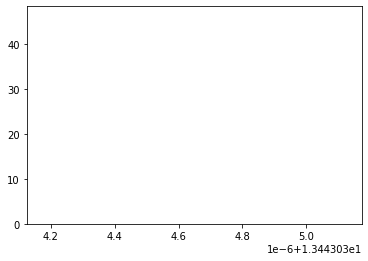

In [ ]:

# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model17 = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model17.add(Dense(units=20, input_dim=103, kernel_initializer='normal', activation='tanh'))

model17.add(Dense(units=20, input_dim=103, kernel_initializer='normal', activation='gelu'))

model17.add(Dense(units=30, input_dim=103, kernel_initializer='normal', activation='gelu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model17.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model17.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model17.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model17.fit(x_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

predict17 = model17.predict(x_train)
loss = sum((predict17 - y_train) ** 2) / len(predict17)
print(loss)
print(model17.predict(x_test))
plt.hist(model17.predict(x_test))
# plt.show()

# cross validation
'''
r2 = model_selection.cross_val_score(model17, x_train, y_train, cv = 10, scoring='r2')
MSE = model_selection.cross_val_score(model17, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", MSE) # there is a very significant outlier on the 7th iteration
print(f'For Artificial Neural Network (Regressor), the mean MSE is {np.mean(MSE)} +/- {1.96 * np.std(MSE)/(len(MSE) ** 0.5)}')
print(f'For Artificial Neural Network (Regressor), the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')
'''

Model: 18 - Decision Tree

0.0
[131.20437493 132.82348671 143.27551485 117.41678504 184.32915316
 130.57785361 137.92337    140.92557051 158.02456365 192.61851316
 143.27551485 103.43992684 137.08071515 127.72939656 118.45147949
 139.17849365 139.17849365 158.02456365 117.41678504 184.32915316
 113.31852268 144.91035316 167.0304     107.35314656 145.43403656
 130.57785361 146.20841748 144.81201    139.17849365 151.03410635
 143.33551329 118.99737949 142.64109732 177.62320493 137.92337
 170.36562639 127.72939656 158.02456365 118.99737949 184.32915316
 113.31852268 106.98238507 167.47573226 117.41678504 118.04336361
 128.07018    132.82348671 144.81201    177.62320493 166.36489748
 167.0304     157.84644684]


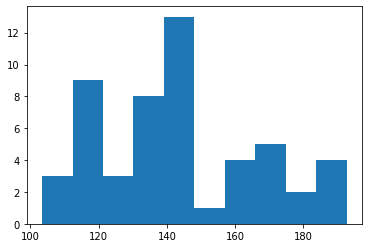

[-0.03106124  0.38966114 -0.12461383 -1.11426151 -1.97193935 -0.86417485
 -0.75527077  0.25660096 -0.49960215 -1.11144696] 
 [-20.77053405 -19.58029472 -20.3769229  -19.72875616 -22.98134868
 -26.86553007 -29.48426067 -23.25960448 -27.20482854 -30.61708847]
For Decision Tree (Regressor) , the mean MSE is -24.08691687369343 +/- 2.4416668894118283
For Decision Tree (Regressor) , the mean r2 is -0.5826108560146568 +/- 0.42816429572763354


In [ ]:
# Decision Tree (Regressor)
from sklearn.tree import DecisionTreeRegressor
model18 = DecisionTreeRegressor() #Initializing the DecisionTreeRegressor model
model18.fit(x_train, y_train)

# general prediction
predict18 = model18.predict(x_train)
loss = sum((predict18 - y_train) ** 2) / len(predict18)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model18.predict(x_test))
plt.hist(model18.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model18, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model18, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For Decision Tree (Regressor) , the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For Decision Tree (Regressor) , the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For Decision Tree (Regressor) , the mean RMSE is -24.08691687369343 +/- 2.4416668894118283
# For Decision Tree (Regressor) , the mean r2 is -0.5826108560146568 +/- 0.42816429572763354

# Overfitted?

Model: 19 - Extra Tree Regressor

0.0
[142.64109732  81.06394515 132.82348671 151.53909344 170.36562639
 105.68033268 167.47573226  92.59186329 100.67459507 167.47573226
 177.62320493 167.0304     143.16551496 175.99761496 134.49723732
 145.43403656 143.47962252 143.16551496 170.36562639 167.0304
  89.98987     81.06394515 117.41678504 142.64109732 113.31852268
 158.02456365 143.47962252 103.43992684 117.41678504 139.17849365
 113.31852268 118.99737949 144.91035316 175.99761496  92.59186329
 139.17849365  90.07331684 143.16551496 130.57785361 167.0304
 113.31852268  81.06394515 117.41678504 142.64109732 119.56647515
 106.98238507 113.31852268 134.07936639 125.97020226 117.41678504
 144.81201    167.0304    ]


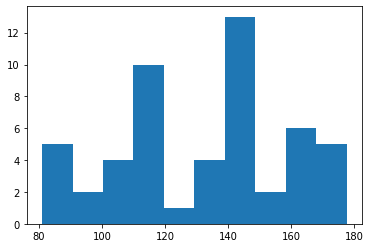

[-1.60925323 -0.09804698 -1.15629554 -1.64881227 -1.63987648 -1.80335964
 -0.34096488  0.24830439 -0.36594984 -1.03728222] 
 [-21.710388   -22.08409597 -24.51735866 -21.56294099 -28.78453333
 -32.37819296 -24.05168214 -38.70791799 -34.63154638 -25.76226867]
For Extra Tree (Regressor) , the mean MSE is -27.419092507589237 +/- 3.5267190191831745
For Extra Tree (Regressor) , the mean r2 is -0.9451536684548054 +/- 0.44049196031140986


In [ ]:
# Extra Tree
from sklearn.tree import ExtraTreeRegressor
model19 = ExtraTreeRegressor() #Initializing the ExtraTreeRegressor model
model19.fit(x_train, y_train)

# general prediction
predict19 = model19.predict(x_train)
loss = sum((predict19 - y_train) ** 2) / len(predict19)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model19.predict(x_test))
plt.hist(model19.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model19, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model19, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For Extra Tree (Regressor) , the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For Extra Tree (Regressor) , the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For Extra Tree (Regressor) , the mean RMSE is -27.419092507589237 +/- 3.5267190191831745
# For Extra Tree (Regressor) , the mean r2 is -0.9451536684548054 +/- 0.44049196031140986

# Overfitted?

Model: 20 - Gradient Boosting Regressor

11.539076631937633
[129.61638999 122.51519117 147.24628747 130.67318001 164.70473354
 139.49548169 143.15013658 125.50599119 146.74645726 156.23290912
 151.25004107 139.92666009 121.15716577 146.60345165 150.72968672
 165.5855953  168.3587079  141.30524673 154.81327816 162.10693752
 126.90073423 138.30247792 146.57101729 123.85297594 148.67646771
 130.77051271 153.25867281 132.51636156 145.19552873 137.29243616
 137.78694617 125.52285297 148.53583053 122.29662526 126.25250596
 177.0509685  148.85260135 155.12084562 135.87124824 166.16176744
 125.05760656 129.96287591 142.88560415 125.9449546  130.80971113
 114.48501108 136.26811805 142.97829777 144.42886474 136.38094248
 149.59755789 147.09702952]


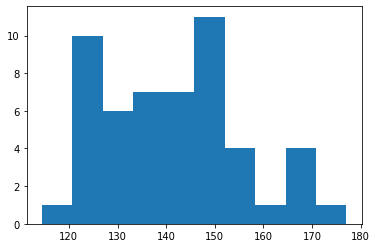

In [ ]:
# GBDT GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor 
model20 = GradientBoostingRegressor() #Initializing the GBDT Regression model
model20.fit(x_train, y_train)

# general prediction
predict20 = model20.predict(x_train)
loss = sum((predict20 - y_train) ** 2) / len(predict20)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(model20.predict(x_test))
plt.hist(model20.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model20, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model20, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For GradientBoostingRegressor , the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For GradientBoostingRegressor, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For GradientBoostingRegressor , the mean RMSE is -18.73628745404758 +/- 2.2832817285855995
# For GradientBoostingRegressor, the mean r2 is 0.07366182967215469 +/- 0.2625194604380357

# Slightly Overfitted?

Model-21 Multivariate Adaptive Regression Splines (Earth)

Note: Unable to implement due to obsoleteness of the model since 2019.

In [ ]:
# Multivariate ARS (Earth)
# requires pyearth package
!pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-learn-contrib/py-earth (to revision v0.2dev) to /tmp/pip-req-build-o7ir5_tq
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/py-earth /tmp/pip-req-build-o7ir5_tq
  Running command git checkout -b v0.2dev --track origin/v0.2dev
  Switched to a new branch 'v0.2dev'
  Branch 'v0.2dev' set up to track remote branch 'v0.2dev' from 'origin'.
  Resolved https://github.com/scikit-learn-contrib/py-earth to commit 400f84d435b7277124535c09ca32132c1d0eaa74
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for sklearn-contrib-py-earth
  Running setup.py clean for sklear

Model: 22 - Ridge Regression

4.487526281761867e-27
[ 90.46263     86.12328361  93.24152329  89.02279774 145.67073344
  88.70069493  80.83331316  85.12277496  88.75587732  96.95091051
  94.93290485 107.35040635  94.87852748 115.01262     97.77429748
 126.13316635  96.58815485 138.09183051 114.07371732 148.49296496
  98.86692316  94.82787493 152.97148344  95.05371774  97.84860329
  98.24029361  98.71625     93.42204639  93.62436671 125.58866226
  97.93045656 135.06162507 106.46825684 134.16238504  77.41781268
  85.72803949  90.87311515  66.41797365  93.55764252  85.81107
  64.26306252 104.96377365  93.31873515 115.94794949  62.79869268
 120.83503504 110.36738684  83.11650507 128.26905656  78.73948226
  80.38100671  82.02585639 109.9911      84.24934361 135.78596329
 122.46548774  83.17557344 141.36087493  94.32640316  90.79871496
  96.94024732  97.16390051 112.93374485  97.34901635 103.86733748
 110.70874    120.26183748 101.19575635 103.14751485 103.23901051
 101.60361732 133.01050496 102.80026316 120.44921493 100.

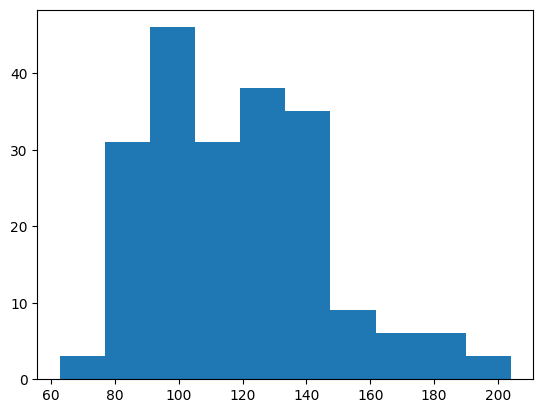

[-0.46918522 -0.39878883 -0.06085713 -1.09002134 -0.30053092 -1.49058724
 -0.25468421  0.50391824 -0.13429329 -0.87593863] 
 [-23.86012743 -25.17468026 -21.16504697 -21.10043971 -20.47937205
 -32.5279456  -21.55178296 -18.13262843 -25.8932306  -24.55596201]
For Polynomial Regression , the mean RMSE is -23.444121600677242 +/- 2.3535327735889324
For Polynomial Regression, the mean r2 is -0.4570968563442242 +/- 0.3336557930425961


In [42]:
# Quadratic Regression
# --
from sklearn import metrics, model_selection # this is used for cross validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

#Edit: added second square bracket above to fix the ValueError problem

clf22 = PolynomialFeatures(degree=2) #Define 2nd order degree polynomial (Quadratic form)

#Transformation process
#x_trans_train = model21.fit_transform(x_train)

model22 = linear_model.LinearRegression()
model22.fit(clf22.fit_transform(x_train), y_train)

predict22 = model22.predict(clf22.fit_transform(x_train))
loss = sum((predict22 - y_train) ** 2) / len(predict22)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(predict22)
plt.hist(predict22)
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model22, clf22.fit_transform(x_train), y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model22, clf22.fit_transform(x_train), y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For Polynomial Regression , the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For Polynomial Regression, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')


# For Polynomial Regression , the mean RMSE is -23.444121600677242 +/- 2.3535327735889324
# For Polynomial Regression, the mean r2 is -0.4570968563442242 +/- 0.3336557930425961

# Overfitted?

Model: 23 - Polynomial Regression (Order 3)

1.5428662947528738e-26
[ 90.46263     86.12328361  93.24152329  89.02279774 145.67073344
  88.70069493  80.83331316  85.12277496  88.75587732  96.95091051
  94.93290485 107.35040635  94.87852748 115.01262     97.77429748
 126.13316635  96.58815485 138.09183051 114.07371732 148.49296496
  98.86692316  94.82787493 152.97148344  95.05371774  97.84860329
  98.24029361  98.71625     93.42204639  93.62436671 125.58866226
  97.93045656 135.06162507 106.46825684 134.16238504  77.41781268
  85.72803949  90.87311515  66.41797365  93.55764252  85.81107
  64.26306252 104.96377365  93.31873515 115.94794949  62.79869268
 120.83503504 110.36738684  83.11650507 128.26905656  78.73948226
  80.38100671  82.02585639 109.9911      84.24934361 135.78596329
 122.46548774  83.17557344 141.36087493  94.32640316  90.79871496
  96.94024732  97.16390051 112.93374485  97.34901635 103.86733748
 110.70874    120.26183748 101.19575635 103.14751485 103.23901051
 101.60361732 133.01050496 102.80026316 120.44921493 100

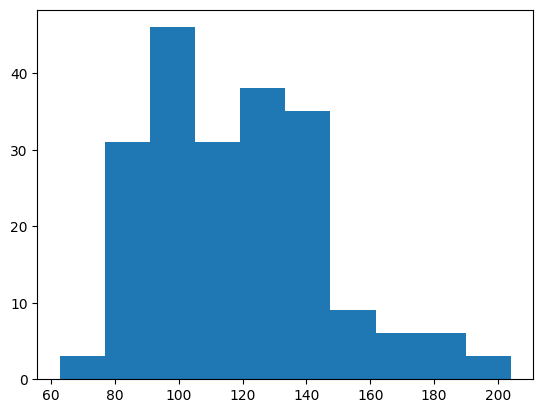

[-0.01630983 -0.0879725   0.12476343 -0.64566013 -0.09618054 -1.81646944
 -0.20424457  0.40940936 -0.24462448 -1.05280282] 
 [-19.84483746 -22.2022426  -19.22443182 -18.72346478 -18.80170954
 -34.59061449 -21.11413715 -19.78460631 -27.12331253 -25.68746561]
For Polynomial Regression , the mean RMSE is -22.709682230396204 +/- 2.987825002415939
For Polynomial Regression, the mean r2 is -0.36300915152670654 +/- 0.38253005995761585


In [41]:
# Polynomial Regression of order 3
# --
from sklearn import metrics, model_selection # this is used for cross validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

#Edit: added second square bracket above to fix the ValueError problem

clf23 = PolynomialFeatures(degree=3) #Define 3rd order degree polynomial (Cubic form)

#Transformation process
#x_trans_train = model23.fit_transform(x_train)

model23 = linear_model.LinearRegression()
model23.fit(clf23.fit_transform(x_train), y_train)

predict23 = model23.predict(clf23.fit_transform(x_train))
loss = sum((predict23 - y_train) ** 2) / len(predict23)
print(loss) #Printing the MSE Loss function between the given values in yTrain.npy and the predicted values by the model
print(predict23)
plt.hist(predict23)
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model23, clf23.fit_transform(x_train), y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model23, clf23.fit_transform(x_train), y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For Polynomial Regression , the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For Polynomial Regression, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')


# For Polynomial Regression , the mean RMSE is -23.444121600677242 +/- 2.3535327735889324
# For Polynomial Regression, the mean r2 is -0.4570968563442242 +/- 0.3336557930425961

# Overfitted?

# Part: D - Optimization of the 5 best performing regression models

Model: 4 - Bayesian Ridge Regression

245.6801631218691
[133.38709075 126.05897242 136.80371659 125.27762624 146.16867523
 124.53259966 133.9156162  110.50009521 134.52026951 143.45677865
 146.94524144 130.65041836 113.29315539 140.01500746 142.65354045
 151.26014291 154.2974095  152.26353486 164.66531111 170.36657177
 140.39885463 147.75025421 160.27532765 139.32194489 146.1329969
 135.26826723 141.57936552 127.94498323 137.52280217 152.24895096
 145.15106694 137.59400413 158.5126866  127.68210012 131.47131567
 169.94996242 153.50998815 149.97752096 139.0079736  171.54563112
 142.30823947 137.96109262 145.8794959  137.09968973 131.88355047
 128.70936049 144.13729721 153.3805331  147.31566553 147.39834743
 155.67405482 149.01153143]


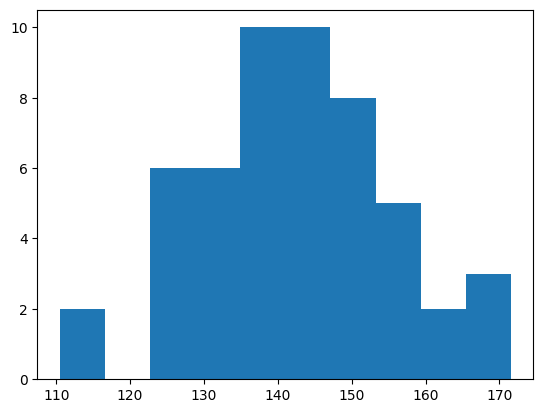

[ 0.20801847 -0.04243133  0.39711221 -0.04282326 -0.57026449 -1.1008664
 -0.25514154  0.44124085  0.22437325 -0.59272573] 
 [-17.51830212 -21.73259625 -15.95544903 -14.90464031 -22.50311817
 -29.87479768 -21.55571045 -19.24404906 -21.41164077 -22.62653945]
For BayesianRidge, the mean RMSE is -20.732684329501566 +/- 2.4929312317822285
For BayesianRidge, the mean r2 is -0.13335079679197098 +/- 0.2923848312768139


([1.1977425625306932e-14,
  1.6149759035671333e-14,
  137.14601064647695,
  142.4279172344545,
  195.98087930334708,
  215.89410853584593,
  231.53120913091658,
  246.68991242953058,
  234.85688524567828,
  241.57430731887686],
 [878.6727869080297,
  838.7959795932027,
  1064.9325660133256,
  963.7446755197702,
  739.7867840448321,
  462.79764859840253,
  568.536740893899,
  358.1334134133606,
  327.67099109972963,
  370.9142905710629])

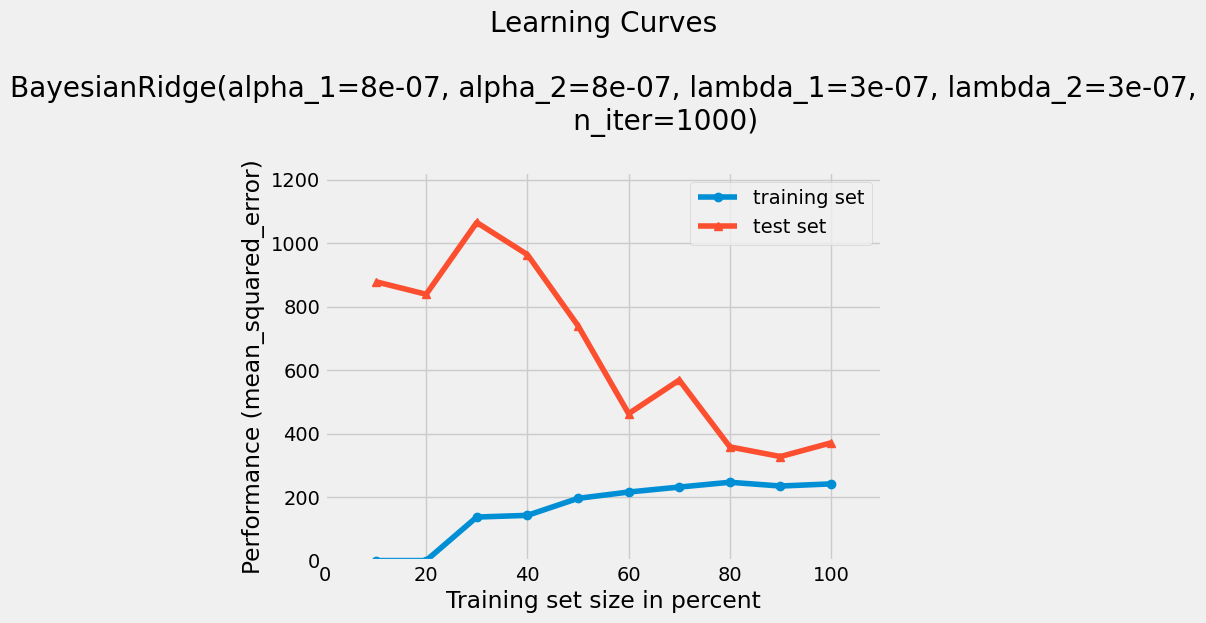

In [55]:
from sklearn import linear_model

a = np.random.rand(len(x_train)) <= 0.8
t_x, t_y = x_train[a], y_train[a]
valid_x, valid_y = x_train[~a], y_train[~a]


model04 = linear_model.BayesianRidge(n_iter=1000,alpha_1 = 0.8e-6, alpha_2 = 0.8e-6, lambda_1=0.3e-06, lambda_2=0.3e-06)
model04.fit(x_train, y_train)
predict04 = model04.predict(x_train)
loss = sum((predict04 - y_train) ** 2) / len(predict04)
print(loss)
print(model04.predict(x_test))
plt.hist(model04.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model04, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model04, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE)
print(f'For BayesianRidge, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For BayesianRidge, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For BayesianRidge, the mean RMSE is -20.732684593229422 +/- 2.492931207080644
# For BayesianRidge, the mean r2 is -0.1333508585150051 +/- 0.2923848728432609

#plotting learning curve for MSE
plot_learning_curves(t_x, t_y, valid_x, valid_y, model04, scoring='mean_squared_error')  

([1.0,
  1.0,
  0.702480721393651,
  0.6393366297052779,
  0.520215585583828,
  0.6194190677842939,
  0.5596799979672317,
  0.6446711825554325,
  0.6799233547513118,
  0.6560747874734205],
 [-0.04101989901874514,
  0.006224707326866197,
  -0.2616937827721799,
  -0.14181001134664384,
  0.12352723938136168,
  0.45169399964534285,
  0.3264181280991887,
  0.575696419165604,
  0.611787200937046,
  0.5605540958271269])

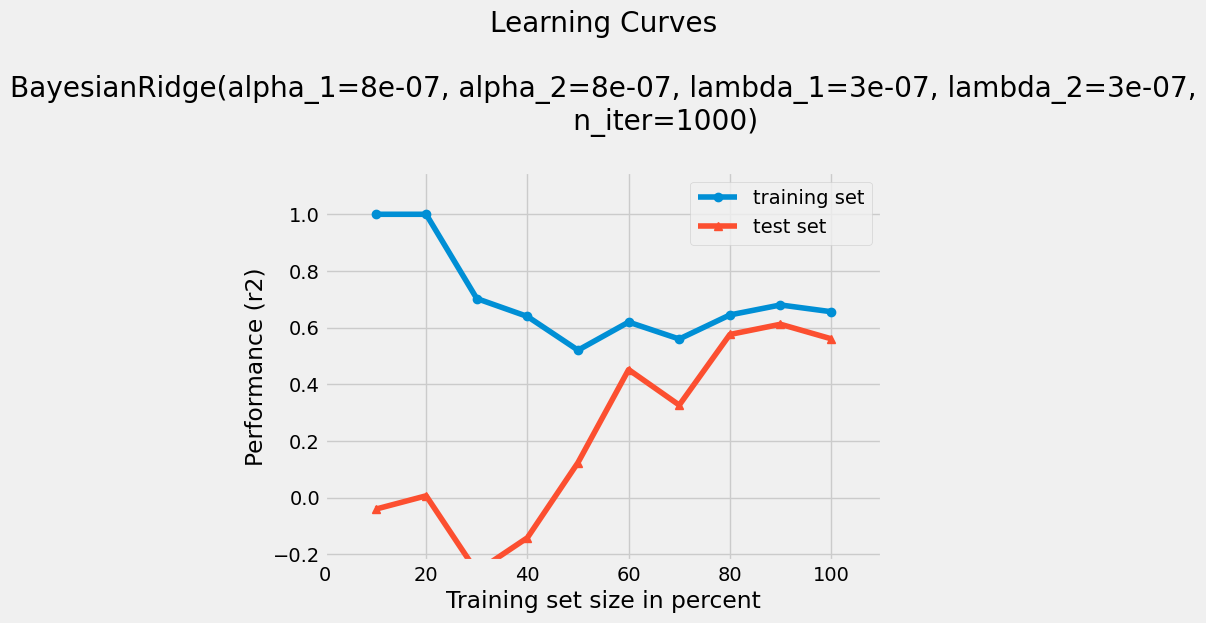

In [56]:
#plotting learning curve for R2
plot_learning_curves(t_x, t_y, valid_x, valid_y, model04, scoring='r2') 

Model: 6 - ARD Regression

216.41066221496203
[134.56890342 122.58271464 144.02028997 124.9323939  149.48877375
 118.26758641 135.48984211 104.16544377 143.26387559 150.03355904
 157.9807923  136.11389336 100.75656439 140.46717332 143.54045235
 151.97959671 160.12350268 162.87122643 165.35849933 179.86996677
 139.92143954 147.57304463 163.64560634 144.54692177 148.85423885
 132.75309818 138.52751594 122.48856871 141.36428103 150.2896019
 149.68327665 142.814765   165.10579909 113.11811523 139.4383768
 171.58047349 165.23221976 152.87898768 144.6265279  178.16294361
 141.13030853 138.47508456 155.3037117  137.60887636 132.99173965
 132.85088797 144.78981392 154.79365267 148.65622823 144.80543083
 155.46209021 161.90886138]


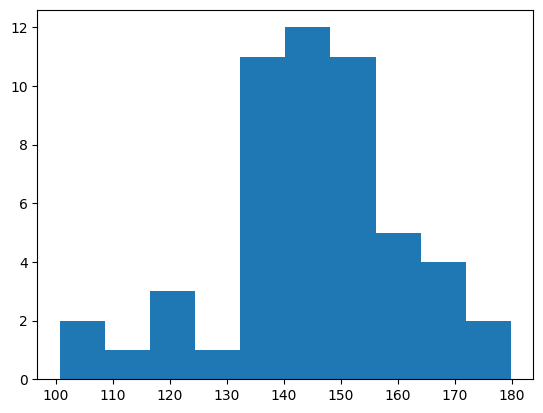

[-0.30528763 -0.44989584  0.32505429 -0.5869743  -0.87977449 -1.58275649
 -0.42605158  0.51953191  0.30270974 -1.1128342 ] 
 [-22.48990365 -25.63045326 -16.88205091 -18.38658577 -24.62119748
 -33.12435925 -22.97648585 -17.84499405 -20.30160429 -26.06035624]
For ARDRegression, the mean RMSE is -22.831799075557928 +/- 2.8669792350378422
For ARDRegression, the mean r2 is -0.41962785777645417 +/- 0.394224085980388


([379.97295623365943,
  0.0002604217097215382,
  0.6668900298515164,
  5.394793997545518,
  48.438078522471564,
  79.89615691773972,
  135.89734628645172,
  131.6100775529984,
  144.33601053731164,
  175.03433917204853],
 [924.7921249298499,
  1174.6819724215593,
  1205.1669850565036,
  971.3299354924111,
  751.5791736425195,
  1006.652516671461,
  641.417063656831,
  646.4020070043774,
  616.1030802334444,
  520.1895562135976])

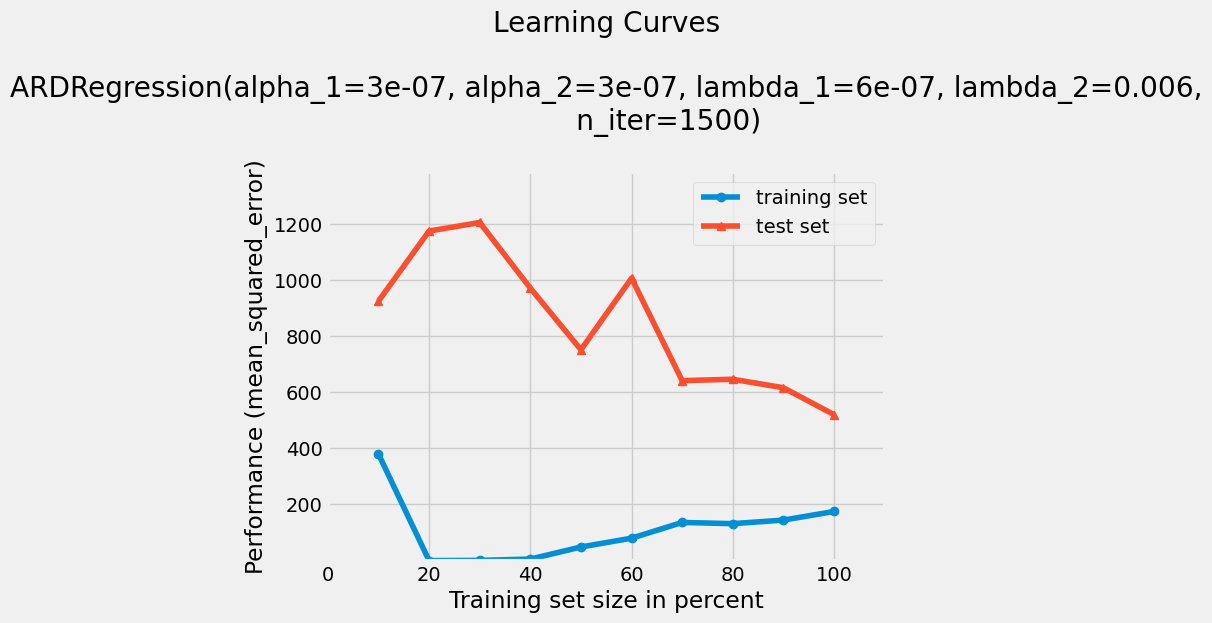

In [57]:
model6 = linear_model.ARDRegression(n_iter = 1500, alpha_1 = 0.3e-6, alpha_2 = 0.3e-6, lambda_1 = 0.6e-6, lambda_2 = 0.6e-2)
model6.fit(x_train, y_train)
predict6 = model6.predict(x_train)
loss = sum((predict6 - y_train) ** 2) / len(predict6)
print(loss)
print(model6.predict(x_test))
plt.hist(model6.predict(x_test))
plt.show()

a = np.random.rand(len(x_train)) <= 0.8
t_x, t_y = x_train[a], y_train[a]
valid_x, valid_y = x_train[~a], y_train[~a]

# cross validation
r2 = model_selection.cross_val_score(model6, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model6, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For ARDRegression, the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For ARDRegression, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For ARDRegression, the mean RMSE is -23.207641179718983 +/- 2.5501171141127545
# For ARDRegression, the mean r2 is -0.4519063138056734 +/- 0.37207905179843387

#plotting learning curve for MSE
plot_learning_curves(t_x, t_y, valid_x, valid_y, model6, scoring='mean_squared_error') 

([0.16003638291110522,
  0.9999993711356489,
  0.9983627348220325,
  0.9844481430063228,
  0.862443221455158,
  0.8837675894357766,
  0.7851917793572886,
  0.8070767145368483,
  0.8096327259471161,
  0.7611670582225651],
 [-0.22522794082841346,
  -0.5562991243113156,
  -0.5966877567941824,
  -0.28688441937006925,
  0.004256439401020717,
  -0.33368219395755805,
  0.15020674708267046,
  0.14360235274559308,
  0.18374444593186134,
  0.310817251121836])

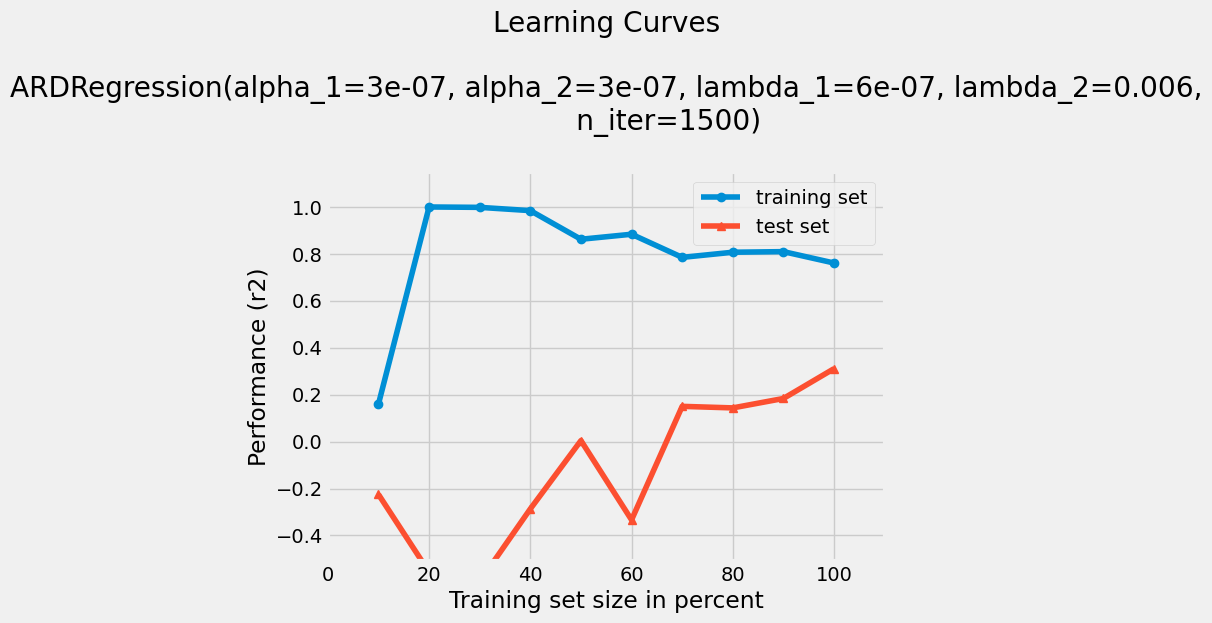

In [58]:
#plotting learning curve for R2
plot_learning_curves(t_x, t_y, valid_x, valid_y, model6, scoring='r2') 

Model: 14 - Random Forest Regression

42.38128290828657
[129.20861684 132.57472796 142.45603004 126.74451531 159.72277362
 137.67433763 141.48846656 128.74779499 137.50088011 147.61666528
 147.96530254 146.2927034  133.79541377 148.95436812 141.0144998
 158.05847094 153.08087593 141.23783158 151.52971206 155.01327992
 139.33438216 141.20437956 138.44707928 123.62208914 139.87004654
 136.42358334 150.1451237  134.42737093 145.95729392 134.53890767
 144.06215451 132.18755432 139.71812015 139.22505748 130.30324895
 161.57569088 146.88655563 145.24530213 134.71783572 156.20820202
 128.85367198 133.8083767  137.72088295 130.67341713 124.44874767
 130.14200334 136.32080399 142.39639042 136.2338141  138.74716789
 140.69000137 142.73667961]


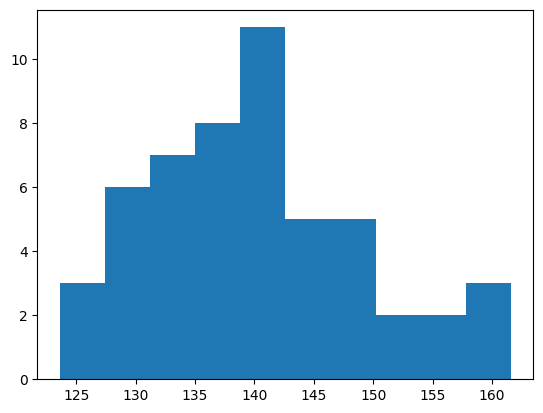

[ 0.4149482   0.32497986  0.34682463  0.31048161  0.18173372 -0.07746567
  0.27788446  0.29604847  0.008311   -0.91872071] 
 [-15.056764   -17.48824584 -16.6075545  -12.11962192 -16.24439809
 -21.39476279 -16.35005941 -21.60008761 -24.21092073 -24.8343914 ]
For Random Forest (Regressor), the mean RMSE is -18.590680629168883 +/- 2.459992669933132
For Random Forest (Regressor), the mean r2 is 0.11650255673368218 +/- 0.23246963198583148


([33.552069541017175,
  43.64867386660302,
  43.16244841266462,
  41.08529631078011,
  37.7097593993969,
  41.22454676435139,
  38.02194466280946,
  39.05017154365457,
  45.252788420596055,
  45.9092434639871],
 [638.678875833886,
  483.6560692805591,
  607.3216890376383,
  580.4917788677245,
  495.4301110472861,
  285.9969925388009,
  294.19927408854176,
  279.1504179377218,
  251.6477505595837,
  220.38331308857124])

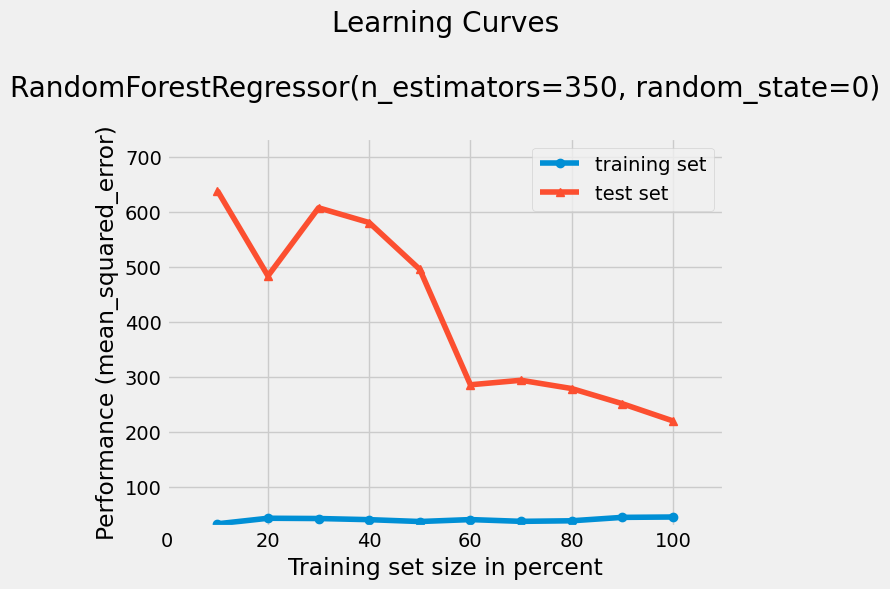

In [60]:
# Random Forest (Regressor)
# import the regressor
from sklearn.ensemble import RandomForestRegressor

a = np.random.rand(len(x_train)) <= 0.8
t_x, t_y = x_train[a], y_train[a]
valid_x, valid_y = x_train[~a], y_train[~a]
 
 # create regressor object
model14 = RandomForestRegressor(n_estimators = 350, random_state = 0)
 
# fit the regressor with x and y data
model14.fit(x_train, y_train) 

predict14 = model14.predict(x_train)
loss = sum((predict14 - y_train) ** 2) / len(predict14)
print(loss)
print(model14.predict(x_test))
plt.hist(model14.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model14, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model14, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For Random Forest (Regressor), the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For Random Forest (Regressor), the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For Random Forest (Regressor), the mean RMSE is -18.751653748635476 +/- 2.726197745195204
# For Random Forest (Regressor), the mean r2 is 0.10195743354007276 +/- 0.25021644982681923

#plotting learning curve for MSE
plot_learning_curves(t_x, t_y, valid_x, valid_y, model14, scoring='mean_squared_error') 

([0.8754142717589736,
  0.9090481685783934,
  0.9091433565093568,
  0.9020673063257748,
  0.9091783722501332,
  0.943500348638587,
  0.9458354554738859,
  0.9477520186549819,
  0.9476962985313933,
  0.9445727773718146],
 [-0.8143409985296872,
  -0.37395656704272584,
  -0.7252623836644243,
  -0.6490447289868895,
  -0.4074039339497373,
  0.1875477823783619,
  0.1642469715009891,
  0.20699733906208828,
  0.2851261435069361,
  0.3739412786960623])

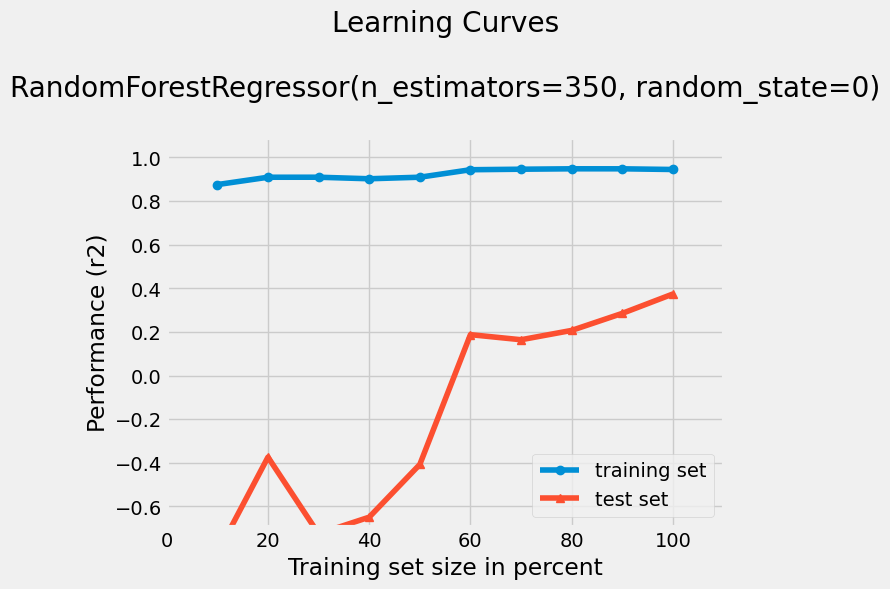

In [61]:
#plotting learning curve for R2
plot_learning_curves(t_x, t_y, valid_x, valid_y, model14, scoring='r2')

Model: 16 - XGBoost Regression

2.5344976306900975
[132.98253  115.85393  148.03355  135.68935  166.98763  131.81209
 140.48888  123.02381  139.33617  155.59366  151.43803  137.76971
 113.916725 137.25984  142.70247  170.09662  161.34508  133.60959
 152.85594  165.43779  136.59804  128.4295   155.92583  121.69598
 154.64955  131.52011  145.28256  128.63528  144.86331  138.34505
 138.06337  120.69977  156.00224  108.57473  118.1111   171.70128
 143.57793  152.31454  139.23059  173.98213  121.09548  126.60178
 131.55168  134.26808  119.96038  113.639366 140.74199  135.19492
 128.91716  130.68596  153.6546   144.26573 ]


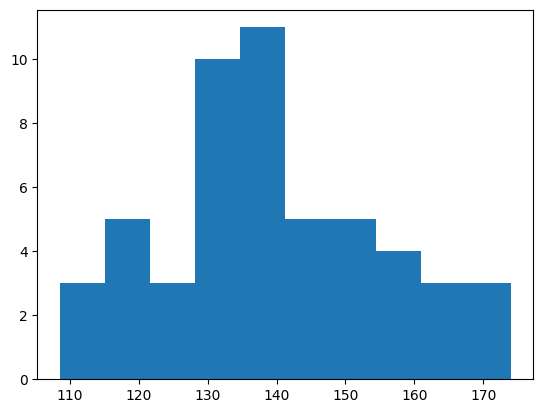

[ 0.52115728  0.35558952  0.15321876  0.26351011  0.17909818 -0.38341149
  0.23546119  0.32852751 -0.08444981 -0.70866392] 
 [-13.62168802 -17.08713228 -18.90934122 -12.52562888 -16.27053766
 -24.24272553 -16.82347697 -21.09590904 -25.31793536 -23.4355939 ]
For XGBoost (Regressor), the mean RMSE is -18.93299688465708 +/- 2.615870457234832
For XGBoost (Regressor), the mean r2 is 0.08600373433080118 +/- 0.22077510878690718


([0.986552110995889,
  0.9890016894256654,
  0.9903928774753262,
  0.989776173208268,
  0.9907152720610554,
  0.9939302302026756,
  0.9947796951360023,
  0.9960210166442475,
  0.9959922911962357,
  0.9961446178037561],
 [-0.17866379867938642,
  -0.3073480262816777,
  -0.2366611343785352,
  -0.12642638385727567,
  -0.144350886760801,
  0.3996502044311635,
  0.44970705889194207,
  0.5185656658525652,
  0.6263075381287461,
  0.5968758624014777])

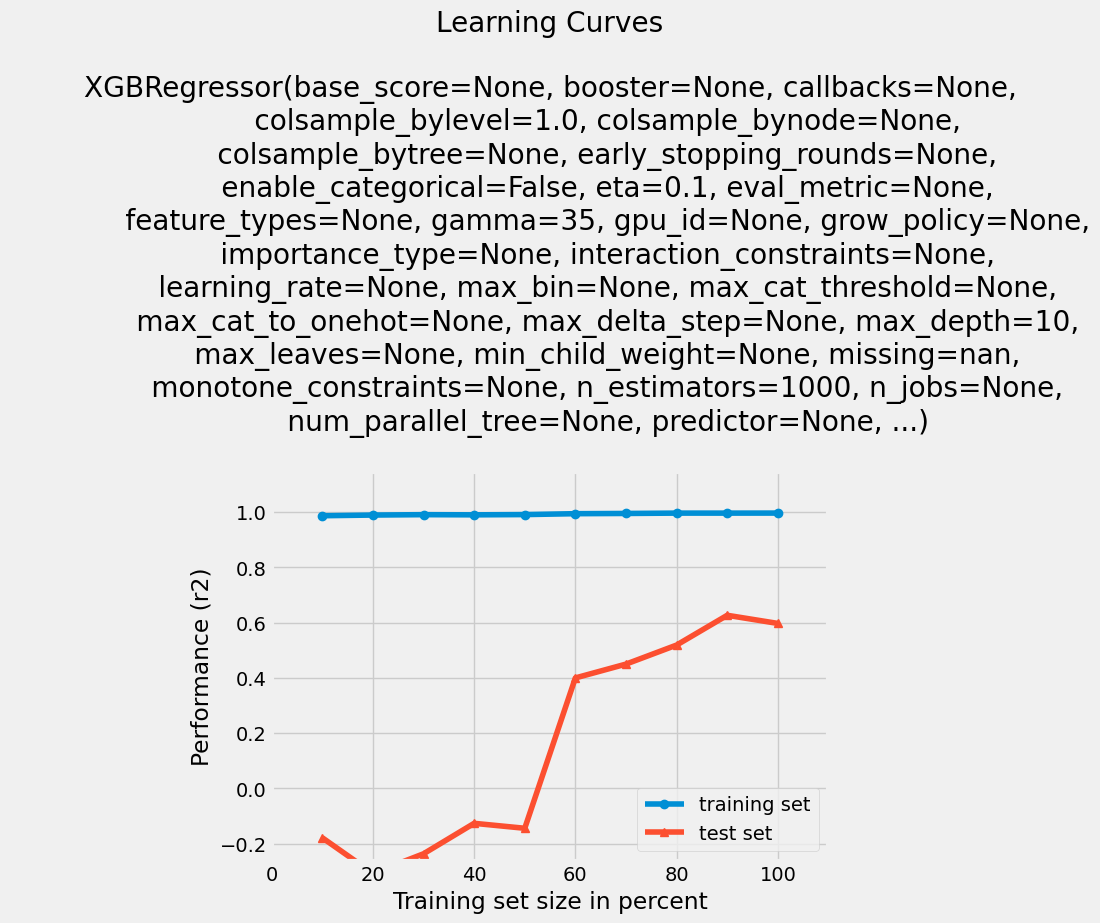

In [62]:
# XGBoost
import xgboost
model16 = xgboost.XGBRegressor(n_estimators=1000, max_depth=10, eta=0.1, subsample=0.9, colsample_bylevel=1.0, gamma = 35)
model16.fit(x_train, y_train)

a = np.random.rand(len(x_train)) <= 0.8
t_x, t_y = x_train[a], y_train[a]
valid_x, valid_y = x_train[~a], y_train[~a]

predict16 = model16.predict(x_train)
loss = sum((predict16 - y_train) ** 2) / len(predict16)
print(loss)
print(model16.predict(x_test))
plt.hist(model16.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model16, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model16, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For XGBoost (Regressor), the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For XGBoost (Regressor), the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For XGBoost (Regressor), the mean RMSE is -18.99561466221016 +/- 2.682083933710935
# For XGBoost (Regressor), the mean r2 is 0.08011477282454826 +/- 0.2312985104506461

# overfitted???

#plotting learning curve for R2 
plot_learning_curves(t_x, t_y, valid_x, valid_y, model16, scoring='r2')

([4.62038079349556,
  4.313724955834284,
  3.6284919382967127,
  3.5767593893747898,
  3.3001896683842875,
  3.198906111550114,
  2.84479831174458,
  2.587642398526694,
  2.7570399278411126,
  2.564421930059954],
 [1199.7536654481178,
  1330.7404438018702,
  1258.788749217757,
  1146.5815649928556,
  1164.8267915654667,
  611.0918725015191,
  560.1393492396605,
  490.0486531554831,
  380.3789523210109,
  410.337249906492])

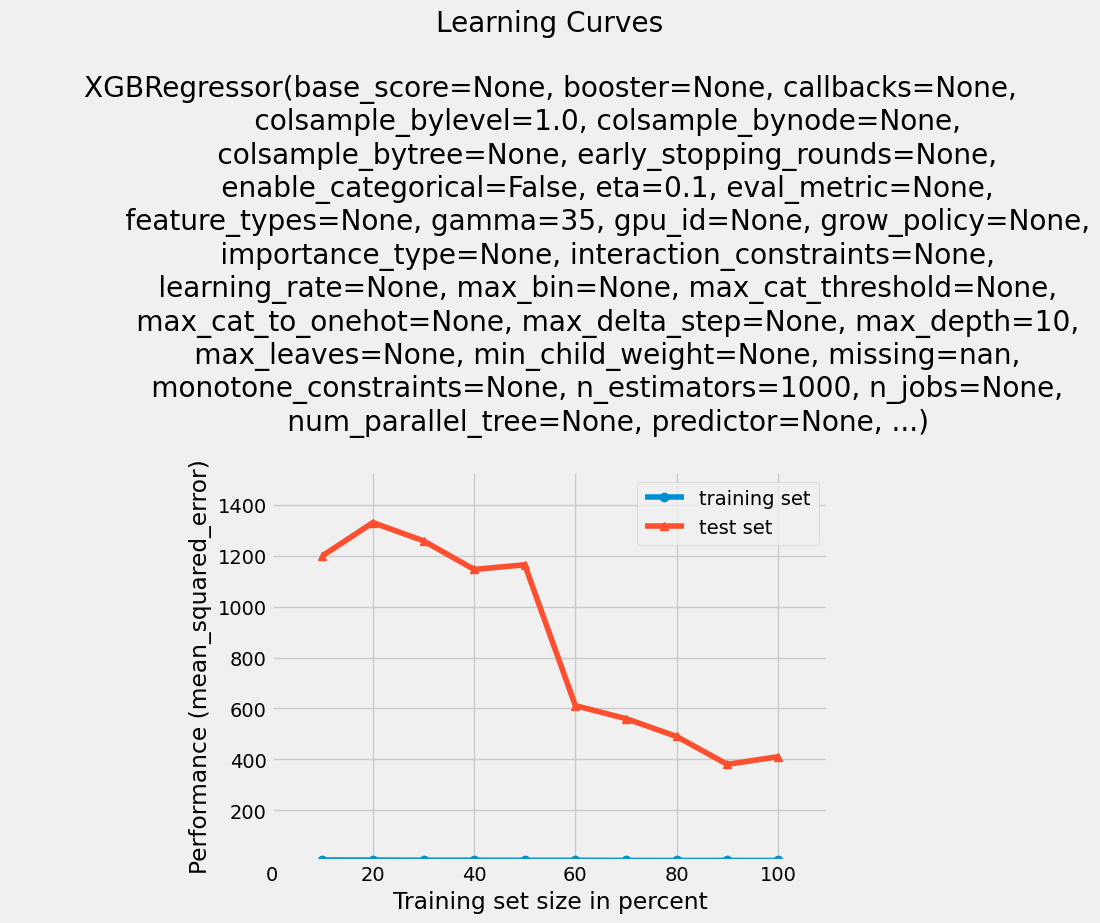

In [63]:
#plotting learning curve for MSE
plot_learning_curves(t_x, t_y, valid_x, valid_y, model16, scoring='mean_squared_error') 


Model: 20 - GBDT Regression

94.14267905289037
[129.17770382 126.26576121 146.2878089  128.28849164 162.20802526
 134.04284897 139.20392341 130.34620457 142.69289928 147.87167881
 147.27689943 138.45259615 125.47224235 144.29153839 132.70008558
 159.43800954 167.90868881 143.4472483  146.84594509 164.84141952
 130.95207279 138.7919066  146.31662654 125.2363849  143.00772522
 129.79013273 147.28077809 129.2225257  145.10805761 137.85847221
 140.88891676 124.13916274 143.05823689 122.28745204 125.1793441
 165.54697946 145.32621889 146.32670655 136.28606485 167.33040448
 127.13337933 130.06793509 137.7015459  129.71931737 123.18874903
 119.98389156 130.44495956 134.82518064 130.57342913 136.9004346
 147.40266079 140.20821759]


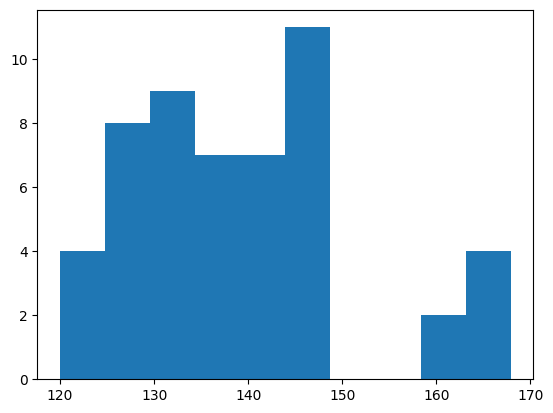

[ 0.50793638  0.29677771  0.36899914  0.3304867   0.20933975 -0.27434865
  0.33753403  0.3488022   0.04426365 -0.49461418] 
 [-13.88072848 -16.80657871 -16.07797952 -11.8080667  -15.92380652
 -23.7225692  -14.88146459 -20.97512475 -24.62670304 -23.48802645]
For GradientBoostingRegressor , the mean RMSE is -18.219104793841648 +/- 2.698923696050865
For GradientBoostingRegressor, the mean r2 is 0.16751767301166817 +/- 0.18718989862093735


([0.9877541449002963,
  0.9836678347550138,
  0.9595602643985117,
  0.9566850175961036,
  0.9316606142670838,
  0.9195463817919232,
  0.9188156851246271,
  0.9259042439654822,
  0.9233825863262657,
  0.8962288312558515],
 [-0.22735686237520225,
  -0.4034178162337285,
  -0.408589043437666,
  -0.38589348219211494,
  -0.213777564486326,
  0.4758526015738471,
  0.4618921526899423,
  0.5029889067033246,
  0.4975633038060957,
  0.519407265587579])

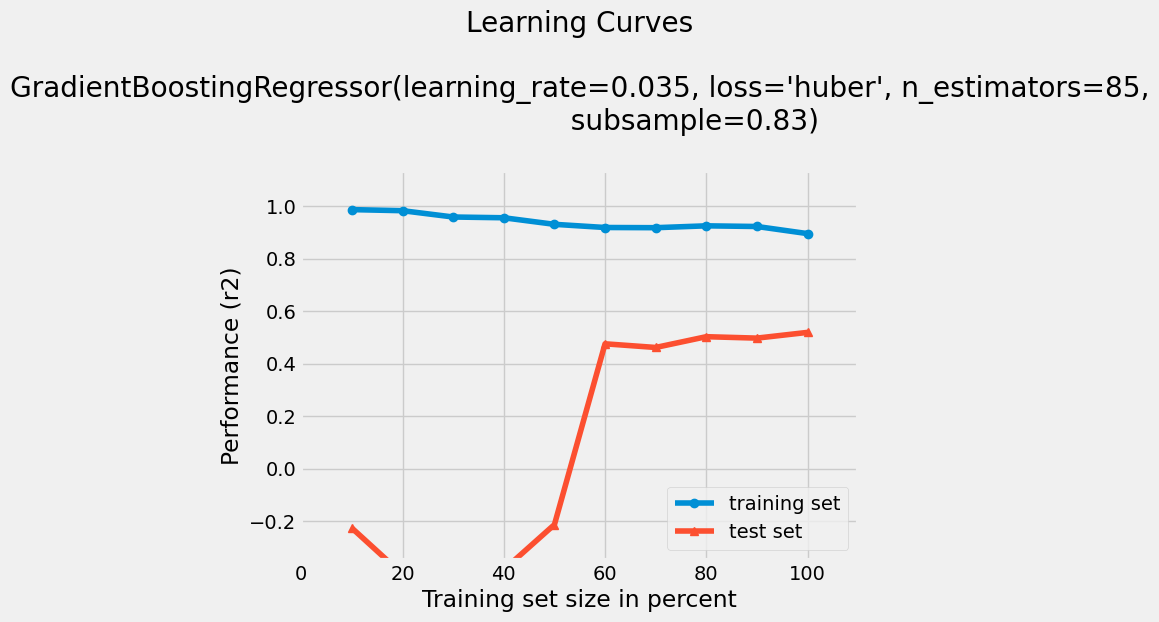

In [64]:
# GBDT GradientBoostingRegressor(?)
from sklearn.ensemble import GradientBoostingRegressor
model20 = GradientBoostingRegressor(loss = 'huber', learning_rate = 0.035, n_estimators = 85, subsample = 0.83, max_depth = 3)
model20.fit(x_train, y_train)

a = np.random.rand(len(x_train)) <= 0.8
t_x, t_y = x_train[a], y_train[a]
valid_x, valid_y = x_train[~a], y_train[~a]

# general prediction
predict20 = model20.predict(x_train)
loss = sum((predict20 - y_train) ** 2) / len(predict20)
print(loss)
print(model20.predict(x_test))
plt.hist(model20.predict(x_test))
plt.show()

# cross validation
r2 = model_selection.cross_val_score(model20, x_train, y_train, cv = 10, scoring='r2')
RMSE = model_selection.cross_val_score(model20, x_train, y_train, cv = 10, scoring='neg_root_mean_squared_error')
print(r2,"\n", RMSE) 
print(f'For GradientBoostingRegressor , the mean RMSE is {np.mean(RMSE)} +/- {1.96 * np.std(RMSE)/(len(RMSE) ** 0.5)}')
print(f'For GradientBoostingRegressor, the mean r2 is {np.mean(r2)} +/- {1.96 * np.std(r2)/(len(r2) ** 0.5)}')

# For GradientBoostingRegressor , the mean RMSE is -18.73628745404758 +/- 2.2832817285855995
# For GradientBoostingRegressor, the mean r2 is 0.07366182967215469 +/- 0.2625194604380357

# Slightly Overfitted?

#Plotting learning curve for R2
plot_learning_curves(t_x, t_y, valid_x, valid_y, model20, scoring='r2')

([5.009351353626737,
  4.885661931859763,
  15.782056318017174,
  17.054160564981345,
  27.02510917793315,
  49.60351741735636,
  51.66842224173781,
  55.76486165582331,
  56.87959754253077,
  75.21293202619894],
 [946.970009279883,
  1106.923941795876,
  1056.5528035422847,
  1110.128186176401,
  935.1516867963493,
  410.6891404791369,
  417.9019882769076,
  406.59513204206,
  394.584871077494,
  373.4255074493844])

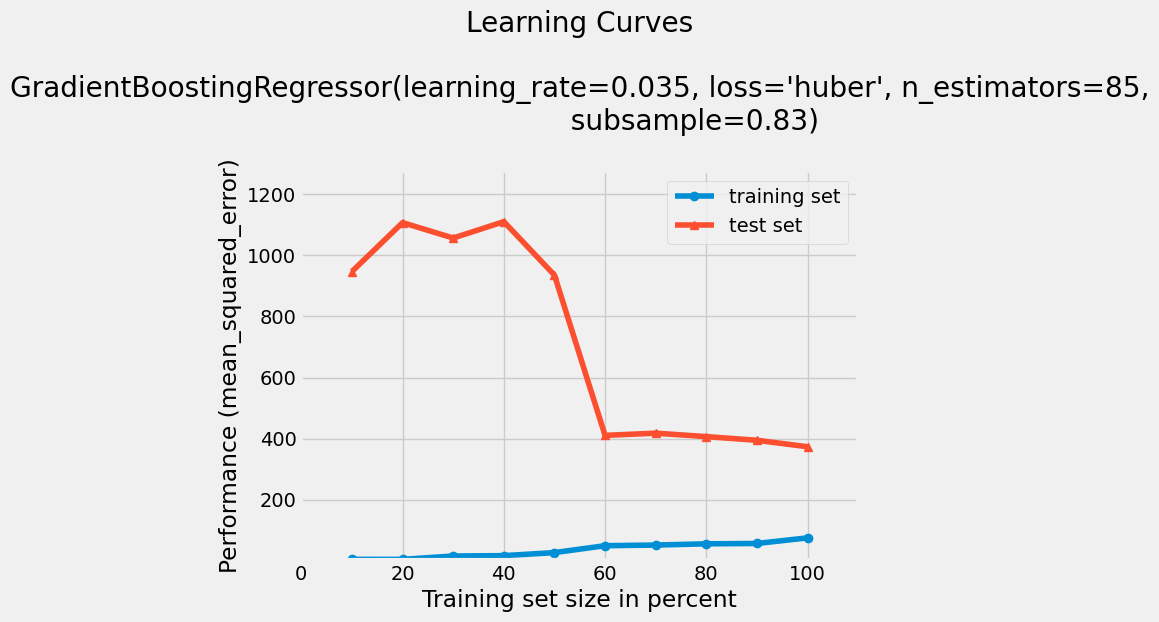

In [65]:
#Plotting learning curve for MSE
plot_learning_curves(t_x, t_y, valid_x, valid_y, model20, scoring='mean_squared_error')

# Part: E - Predicting failure scores with the Test Dataset (xTest.npy file) using GBDT

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

model20 = GradientBoostingRegressor(loss = 'huber', learning_rate = 0.035, n_estimators = 85, subsample = 0.83, max_depth = 3)

model20.fit(x_train, y_train)
xTest = np.load('xTest.npy')
yTest = model20.predict(xTest)

print(yTest)
np.save('yPred.npy', yTest)
os.getcwd()

[126.1785987  126.55748226 147.01464259 125.14712276 160.55539798
 136.17350613 139.07379997 126.91259342 142.59168824 145.1266397
 149.18976897 137.32351683 127.66460732 144.48865443 134.88764432
 156.64895738 160.7327904  139.82355657 150.60567661 159.39300129
 130.20815629 137.1711083  145.21542287 126.03734296 142.93272842
 133.85966192 146.15504818 126.8190557  139.65379678 135.12847533
 144.37293848 124.20653827 145.19833703 128.98827403 121.33930502
 160.97166406 140.12886471 144.51791988 136.40729424 160.97197966
 126.01840231 126.14863602 137.10084596 126.20770024 120.84848753
 123.64811511 133.22639688 137.3587618  131.45645729 137.04522163
 148.48698614 141.72945207]


'/content'